In [7]:
!pip install -q dagshub mlflow

In [8]:
import pandas as pd
import numpy as np

### Loading Our Bitcoin Data

In [9]:
df = pd.read_csv('bitcoin.csv' , parse_dates=['Start' , 'End'] , index_col=['Start'])

In [10]:
df.head()

,End,Open,High,Low,Close,Volume,Market Cap
Start,,,,,,,
2025-03-30,2025-03-31,82655.67,83524.98,81650.45,82345.82,3.173334e+10,1.643757e+12
2025-03-29,2025-03-30,84364.84,84573.51,81771.86,82659.11,4.284893e+10,1.649215e+12
2025-03-28,2025-03-29,87134.99,87487.48,83664.96,84428.01,5.068696e+10,1.689252e+12
2025-03-27,2025-03-28,86943.66,87706.66,85938.04,87233.76,4.579013e+10,1.729989e+12
2025-03-26,2025-03-27,87333.61,88245.26,85937.46,86945.41,4.766890e+10,1.731789e+12


In [11]:
df = df.drop('End' , axis=1)

In [12]:
df.head(10)

,Open,High,Low,Close,Volume,Market Cap
Start,,,,,,
2025-03-30,82655.67,83524.98,81650.45,82345.82,3.173334e+10,1.643757e+12
2025-03-29,84364.84,84573.51,81771.86,82659.11,4.284893e+10,1.649215e+12
2025-03-28,87134.99,87487.48,83664.96,84428.01,5.068696e+10,1.689252e+12
2025-03-27,86943.66,87706.66,85938.04,87233.76,4.579013e+10,1.729989e+12
2025-03-26,87333.61,88245.26,85937.46,86945.41,4.766890e+10,1.731789e+12
2025-03-25,87345.15,88448.53,86349.98,87483.06,5.611942e+10,1.731916e+12
2025-03-24,85967.42,88654.16,85568.55,87365.98,9.201893e+10,1.732703e+12
2025-03-23,83833.25,85804.35,83833.25,85750.02,6.576804e+10,1.679311e+12
2025-03-22,84074.52,84528.35,83742.10,83798.13,9.297372e+10,1.669818e+12


In [13]:
df.tail(10)

,Open,High,Low,Close,Volume,Market Cap
Start,,,,,,
2010-07-26,0.0560,0.0560,0.0560,0.0560,0.0,196311.344444
2010-07-25,0.0505,0.0505,0.0505,0.0505,0.0,176352.312500
2010-07-24,0.0545,0.0545,0.0545,0.0545,0.0,190320.812500
2010-07-23,0.0626,0.0626,0.0626,0.0626,0.0,216988.726244
2010-07-22,0.0505,0.0505,0.0505,0.0505,0.0,174906.223958
2010-07-21,0.0792,0.0792,0.0792,0.0792,0.0,274308.375000
2010-07-20,0.0747,0.0747,0.0747,0.0747,0.0,256710.178548
2010-07-19,0.0808,0.0808,0.0808,0.0808,0.0,277570.220000
2010-07-18,0.0858,0.0858,0.0858,0.0858,0.0,294746.595000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5371 entries, 2025-03-30 to 2010-07-17
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        5371 non-null   float64
 1   High        5371 non-null   float64
 2   Low         5371 non-null   float64
 3   Close       5371 non-null   float64
 4   Volume      5371 non-null   float64
 5   Market Cap  5371 non-null   float64
dtypes: float64(6)
memory usage: 293.7 KB


In [15]:
len(df)

5371

In [16]:
btc = pd.DataFrame(df['Close']).rename(columns={'Close' : 'Price'})[::-1]

In [17]:
btc

,Price
Start,
2010-07-17,0.0500
2010-07-18,0.0858
2010-07-19,0.0808
2010-07-20,0.0747
2010-07-21,0.0792
...,...
2025-03-26,86945.4100
2025-03-27,87233.7600
2025-03-28,84428.0100


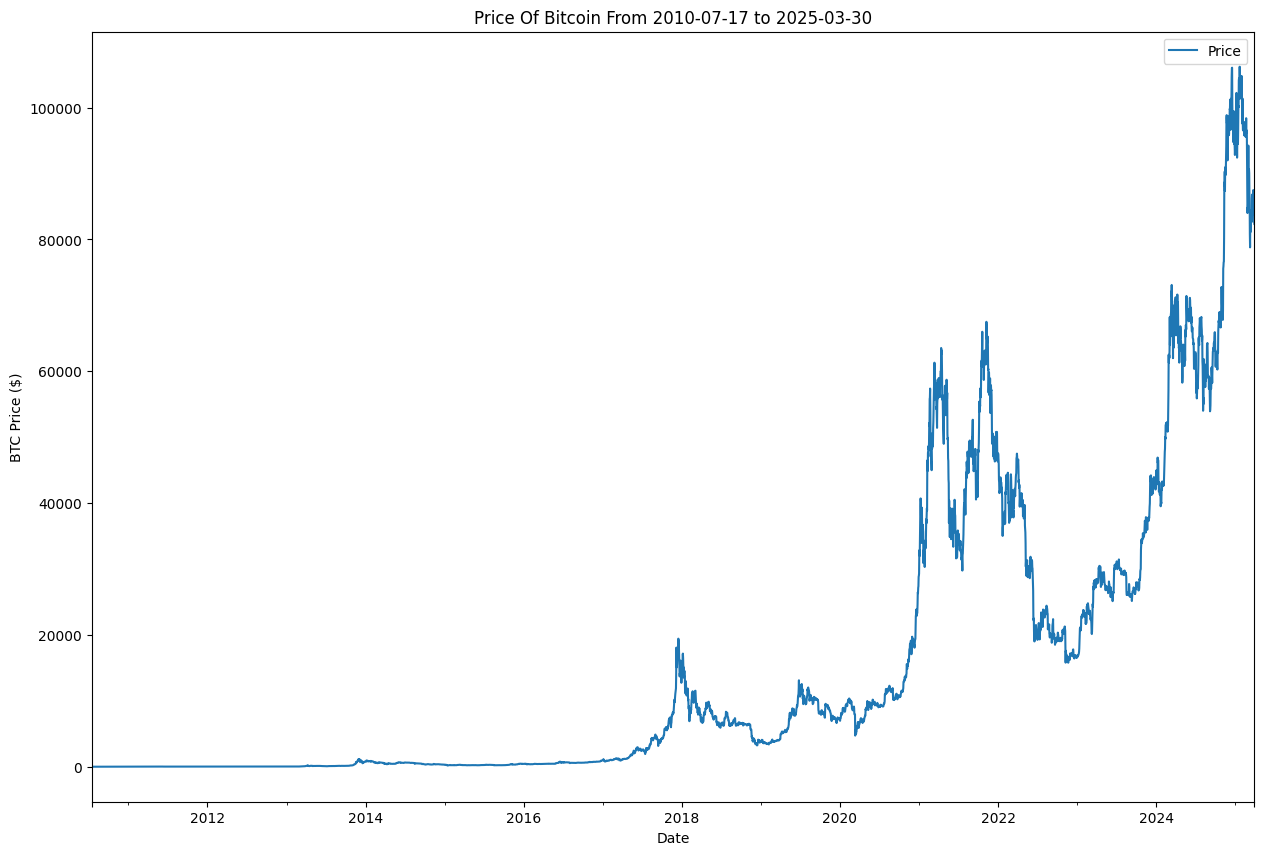

In [18]:
import matplotlib.pyplot as plt

btc.plot(figsize=(15,10))
plt.ylabel("BTC Price ($)")
plt.xlabel("Date")
plt.title("Price Of Bitcoin From 2010-07-17 to 2025-03-30")
plt.show()

### Creating Train and Test Sets

In [19]:
# Note : We can not use sklearn's train test split module here as that randomly slits the train and test splits.

In [20]:
timestamps = btc.index.to_numpy()
prices = btc['Price'].to_numpy()

In [21]:
split_size = int(0.80 * len(prices))

In [22]:
X_train , y_train = timestamps[:split_size] , prices[:split_size]
X_test , y_test = timestamps[split_size:] , prices[split_size:]

In [23]:
len(X_train) , len(y_train) , len(X_test) , len(y_test)

(4296, 4296, 1075, 1075)

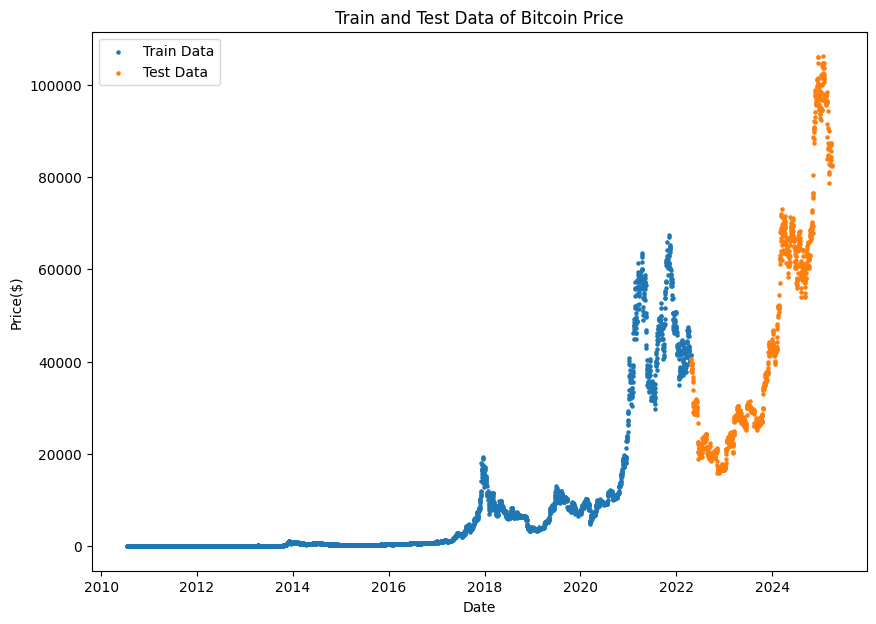

In [24]:
plt.figure(figsize=(10,7))
plt.scatter(X_train , y_train , s=5 , label = "Train Data")
plt.scatter(X_test , y_test , s=5 , label = "Test Data" )
plt.legend()
plt.xlabel("Date")
plt.ylabel("Price($)")
plt.title("Train and Test Data of Bitcoin Price")
plt.show()

In [25]:
# Function To Create Time Series Data

def plot_time_series(timestamps , values , format = "." , start=0 , end = None , label = None):
  plt.plot(timestamps[start:end] , values[start:end] , format , label = label)
  plt.xlabel("Date")
  plt.ylabel("Price ($)")
  if label:
    plt.legend(fontsize = 10)
  plt.grid(True)

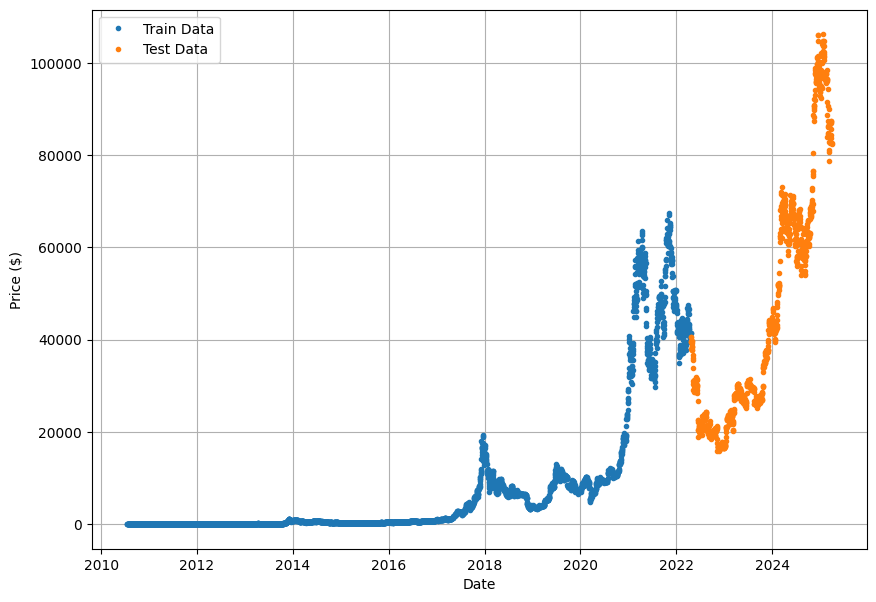

In [26]:
plt.figure(figsize=(10,7))
plot_time_series(timestamps=X_train , values = y_train , label = "Train Data")
plot_time_series(timestamps=X_test , values = y_test , label = "Test Data")

### Modelling Experiments

**Terms :**
 - **Horizon** : Number of timesteps into the future we are going to predict.
 - **Window** : Number of timesteps we are going to use to predict **horizon**.


---



#### Experiment - 0
 - Naive Model (Baseline)

In [27]:
import dagshub
import mlflow
dagshub.init(repo_owner='Shrijeet14', repo_name='BitScry', mlflow=True)
mlflow.set_tracking_uri("https://dagshub.com/Shrijeet14/BitScry.mlflow/")

❗❗❗ AUTHORIZATION REQUIRED ❗❗❗

Output()



Open the following link in your browser to authorize the client:
https://dagshub.com/login/oauth/authorize?state=bfee8f74-4a91-47ce-809c-e6c0a3f429a0&client_id=32b60ba385aa7cecf24046d8195a71c07dd345d9657977863b52e7748e0f0f28&middleman_request_id=8cc066982dc1272970533ff5a83bc884ed977e08e04068cbe486e48f0fb22dd4




Accessing as Shrijeet14

Initialized MLflow to track repo "Shrijeet14/BitScry"

Repository Shrijeet14/BitScry initialized!

In [28]:
# Set or create an experiment
# mlflow.create_experiment("Algorithms")
mlflow.set_experiment("Algorithms")

<Experiment: artifact_location='mlflow-artifacts:/165569fd3a484156bf7491160fcd9799', creation_time=1743444750444, experiment_id='0', last_update_time=1743444750444, lifecycle_stage='active', name='Algorithms', tags={}>

In [29]:
def log_mlflow_regression(model_name, model, Horizon, Window, model_results):
    import mlflow
    import mlflow.sklearn
    with mlflow.start_run():
        mlflow.set_tag("mlflow.runName", f"{model_name}_Horizon{Horizon}_Window{Window}")
        mlflow.set_tag("experiment_type", "algorithm_comparison")
        mlflow.log_param("algo_name", model_name)
        for metric_name, value in model_results.items():
            mlflow.log_metric(metric_name, value)
        mlflow.sklearn.log_model(model, f"{model_name}_Horizon{Horizon}_Window{Window}")

##### Theory About Naive Forecast

Naïve forecasting assumes that the next value in a time series will be the same as the last observed value. It is often used as a baseline model in time series forecasting.  

**Mathematical Formula:**  
$$ \hat{y}_{t+1} = y_t $$  
where $ \hat{y}_{t+1} $ is the predicted value for the next time step, and $\ {y}_{t} $ is the most recent observed value.  

**Key Point:**  
- Works well for stable trends but fails when the data has seasonality or trends.  

[Resource: Forecasting: Principles and Practice](https://otexts.com/fpp3/simple-methods.html)  


##### Implementation

In [30]:
naive_forecast = y_test[:-1]
naive_forecast[:10]  , naive_forecast[-10:]

(array([40528.7777    , 39757.5541    , 39419.5301    , 39479.99697027,
        40475.27521136, 38026.7462556 , 39248.43928178, 39749.9386    ,
        38592.00441699, 37660.45292214]),
 array([84304.83, 84050.18, 83798.13, 85750.02, 87365.98, 87483.06,
        86945.41, 87233.76, 84428.01, 82659.11]))

In [31]:
y_test[-10:]

array([84050.18, 83798.13, 85750.02, 87365.98, 87483.06, 86945.41,
       87233.76, 84428.01, 82659.11, 82345.82])

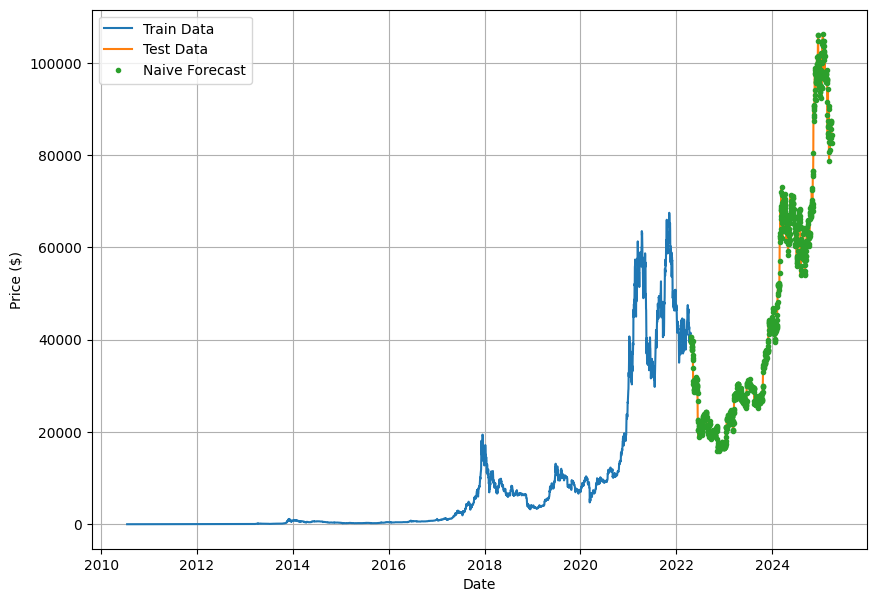

In [32]:
#Plot naive forecast
plt.figure(figsize=(10,7))
plot_time_series(timestamps=X_train , values = y_train , format = "-", label = "Train Data")
plot_time_series(timestamps=X_test , values = y_test , format = "-", label = "Test Data")
plot_time_series(timestamps=X_test[1:] , values = naive_forecast  , label = "Naive Forecast")

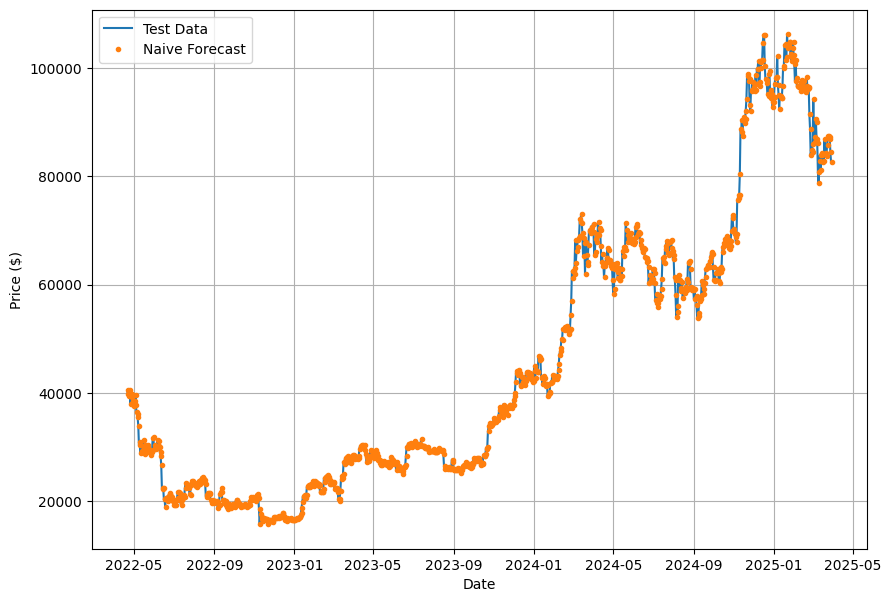

In [33]:
#Plot naive forecast
plt.figure(figsize=(10,7))
plot_time_series(timestamps=X_test , values = y_test , format = "-", label = "Test Data")
plot_time_series(timestamps=X_test[1:] , values = naive_forecast  , label = "Naive Forecast")

In [34]:
import tensorflow as tf

In [35]:
def mean_absolute_scaled_error(y_true , y_pred):
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1]))
  return mae/mae_naive_no_season

In [36]:
def evaluate_preds(y_true, y_pred):
    # Converting data into float32 datatype (for metric calculations)
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    # Mean Absolute Error
    mae_metric = tf.keras.metrics.MeanAbsoluteError()
    mae_metric.update_state(y_true, y_pred)
    mae = mae_metric.result()

    # Mean Squared Error
    mse_metric = tf.keras.metrics.MeanSquaredError()
    mse_metric.update_state(y_true, y_pred)
    mse = mse_metric.result()

    # Root Mean Squared Error (by taking the square root of MSE)
    rmse = tf.sqrt(mse)

    # Mean Absolute Percentage Error
    mape_metric = tf.keras.metrics.MeanAbsolutePercentageError()
    mape_metric.update_state(y_true, y_pred)
    mape = mape_metric.result()

    # Mean Absolute Scaled Error (assuming your custom function is defined similarly)
    mase = mean_absolute_scaled_error(y_true, y_pred)

    return {
        "mae": float(mae.numpy()),
        "mse": float(mse.numpy()),
        "rmse": float(rmse.numpy()),
        "mape": float(mape.numpy()),
        "mase": float(mase.numpy())
    }


In [37]:
naive_results = evaluate_preds(y_true = y_test[1:] , y_pred = naive_forecast)

In [38]:
naive_results

{'mae': 868.1355590820312,
 'mse': 1952797.375,
 'rmse': 1397.42529296875,
 'mape': 1.8928513526916504,
 'mase': 0.9998958706855774}

In [39]:
naive_results["mae"]

868.1355590820312

In [40]:
avg_bitcoin_test_price = tf.reduce_mean(y_test)
avg_bitcoin_test_price

<tf.Tensor: shape=(), dtype=float64, numpy=45326.68494258496>

In [41]:
def log_mlflow_naive(model_name, y_test, Horizon, Window):
    with mlflow.start_run():
        mlflow.set_tag("mlflow.runName", f"{model_name}_Horizon{Horizon}_Window{Window}")
        mlflow.set_tag("experiment_type", "algorithm_comparison")
        mlflow.log_param("algo_name", model_name)
        naive_results = evaluate_preds(y_true = y_test[1:] , y_pred = naive_forecast)
        for metric_name, value in naive_results.items():
            mlflow.log_metric(metric_name, value)

In [ ]:
log_mlflow_naive("Naive_Model" , y_test , Horizon=1, Window=1)

🏃 View run Naive_Model_Horizon1_Window1 at: https://dagshub.com/Shrijeet14/BitScry.mlflow/#/experiments/0/runs/218c91fa39424f12acf4fc828e80adc3
🧪 View experiment at: https://dagshub.com/Shrijeet14/BitScry.mlflow/#/experiments/0


#### Experiment - 1

##### Formatting Our Data
"Windowing our dataset"
  - Horizon = 1
  - Window = 7

In [43]:
len(y_train)

4296

In [44]:
prices[:7]

array([0.05  , 0.0858, 0.0808, 0.0747, 0.0792, 0.0505, 0.0626])

In [45]:
HORIZON = 1
WINDOW_SIZE = 7

In [46]:
def get_labelled_window(x , horizon=HORIZON):
  return x[:,:-horizon] , x[:,-horizon:]

In [47]:
def make_windows(x , window_size = WINDOW_SIZE , horizon = HORIZON):
  # step-1 : creating a window of specific window_size (adding the horizon on the end for labelling later)
  window_step  = np.expand_dims(np.arange(window_size+horizon) , axis=0)

  # step-2 : creating a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)) , axis = 0).T

  #step-3 : Indexing on the target array (a time series ) with 2D array of multiple window steps
  windowed = x[window_indexes]

  #step-4 : Getting the labelled windows
  windows , labels = get_labelled_window(windowed , horizon)
  return windows , labels

In [ ]:
final_windows , final_labels = make_windows(prices , window_size = WINDOW_SIZE , horizon=HORIZON)

In [ ]:
len(final_windows) , len(final_labels)

(5364, 5364)

In [ ]:
for i  in range(5000 , 5006):
  print(f"Window : {final_windows[i]}")
  print(f"Label : {final_labels[i]}")
  print("-"*50)

Window : [69901.99 70059.97 69529.85 70702.74 69850.52 69674.78 71216.98]
Label : [69731.26]
--------------------------------------------------
Window : [70059.97 69529.85 70702.74 69850.52 69674.78 71216.98 69731.26]
Label : [65448.35]
--------------------------------------------------
Window : [69529.85 70702.74 69850.52 69674.78 71216.98 69731.26 65448.35]
Label : [66074.16]
--------------------------------------------------
Window : [70702.74 69850.52 69674.78 71216.98 69731.26 65448.35 66074.16]
Label : [68461.23]
--------------------------------------------------
Window : [69850.52 69674.78 71216.98 69731.26 65448.35 66074.16 68461.23]
Label : [67928.77]
--------------------------------------------------
Window : [69674.78 71216.98 69731.26 65448.35 66074.16 68461.23 67928.77]
Label : [68904.86]
--------------------------------------------------


##### Turning  our created window into train and test sets

In [ ]:
final_windows[:5]  , final_labels[:5]

(array([[0.05  , 0.0858, 0.0808, 0.0747, 0.0792, 0.0505, 0.0626],
        [0.0858, 0.0808, 0.0747, 0.0792, 0.0505, 0.0626, 0.0545],
        [0.0808, 0.0747, 0.0792, 0.0505, 0.0626, 0.0545, 0.0505],
        [0.0747, 0.0792, 0.0505, 0.0626, 0.0545, 0.0505, 0.056 ],
        [0.0792, 0.0505, 0.0626, 0.0545, 0.0505, 0.056 , 0.06  ]]),
 array([[0.0545],
        [0.0505],
        [0.056 ],
        [0.06  ],
        [0.0589]]))

In [48]:
def make_train_test_splits(windows , labels , test_split = 0.2):
  splits_size = int(len(windows) * (1-test_split))
  train_windows = windows[:splits_size]
  train_labels = labels[:splits_size]
  test_windows = windows[splits_size:]
  test_labels = labels[splits_size:]
  return train_windows , train_labels , test_windows ,  test_labels


In [ ]:
train_windows , train_labels , test_windows  , test_labels = make_train_test_splits(final_windows , final_labels)

In [ ]:
len(train_windows) , len(test_windows) , len(train_labels) , len(test_labels)

(4291, 1073, 4291, 1073)

In [ ]:
# Checking if train labels are the same => Before and After Window Split
# Removing the horizon from train_labels, should make things comparable
np.array_equal(np.squeeze(train_labels[:-HORIZON]), y_train[WINDOW_SIZE:len(train_labels) + WINDOW_SIZE - HORIZON])

False

In [ ]:
np.squeeze(train_labels[:-HORIZON])

array([5.45000000e-02, 5.05000000e-02, 5.60000000e-02, ...,
       4.15044185e+04, 4.13635037e+04, 4.05287777e+04])

In [ ]:
y_train[WINDOW_SIZE:len(train_labels) + WINDOW_SIZE - HORIZON]

array([5.45000000e-02, 5.05000000e-02, 5.60000000e-02, ...,
       4.08266711e+04, 4.15044185e+04, 4.13635037e+04])

##### Modelling Checkpoint Checkpoint

In [49]:
# Creating a function to implement a ModelCheckpoint callback with a specific filename.
import os
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name+".keras"), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file


In [61]:
import tensorflow as tf
from tensorflow.keras import layers

##### Model-1 : Dense Model (Window = 7 , horizon = 1)

In [ ]:
tf.random.set_seed(42)

# 1. Construct Model
model1 = tf.keras.Sequential([
  layers.Dense(128 , activation="relu"),
  layers.Dense(HORIZON , activation="linear")
] , name = "Model_1_dense")

# Compiling the Model
model1.compile(
    loss = tf.keras.losses.mae ,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['mae' , "mse"]
)

# Fitting the Model
# Assuming model1 is defined and compiled
model1.fit(
    x=train_windows,
    y=train_labels,
    epochs=100,
    verbose=1,
    batch_size=128,
    validation_data=(test_windows, test_labels),
    callbacks=[create_model_checkpoint(model_name=model1.name)]
)


Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1304.4307 - mae: 1304.4307 - mse: 12808405.0000 - val_loss: 1296.5293 - val_mae: 1296.5293 - val_mse: 3753807.0000
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 345.0556 - mae: 345.0556 - mse: 827729.6250 - val_loss: 1491.4812 - val_mae: 1491.4812 - val_mse: 4469377.0000
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 298.0724 - mae: 298.0724 - mse: 654443.9375 - val_loss: 1157.2872 - val_mae: 1157.2872 - val_mse: 3003771.7500
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 290.9322 - mae: 290.9322 - mse: 615958.5000 - val_loss: 1168.9025 - val_mae: 1168.9025 - val_mse: 3030961.0000
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 277.5046 - mae: 277.5046 - mse: 575417.1250 - val_loss: 1050.5961 - val_mae: 1050.5961 - val_mse: 2575274.5000
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 264.3543 - mae: 264.3543 - mse: 537714.0000 - val_loss: 966.7219 - val_mae: 966.7219 -

##### Evaluations and logging

In [ ]:
# Evaluating model
model1.evaluate(test_windows , test_labels)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 645.2128 - mae: 645.2128 - mse: 1028410.8125


[878.1607055664062, 878.1607055664062, 1983701.0]

In [ ]:
# Load in saved best performing model1 and evaluate it on test_data
model1 = tf.keras.models.load_model("model_experiments/Model_1_dense.keras")
model1.evaluate(test_windows , test_labels)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 642.6400 - mae: 642.6400 - mse: 1029091.6875


[873.011962890625, 873.011962890625, 1970222.625]

In [66]:
# Making forecasts with model1
def make_preds(model , input_data):
  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

In [ ]:
model1_preds = make_preds(model1 , test_windows)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
model1_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([39819.094, 39452.285, 39435.105, 40297.92 , 38311.133, 39054.684,
       39687.363, 38663.5  , 37860.285, 38287.816], dtype=float32)>

In [ ]:
test_labels[:10]

array([[39419.5301    ],
       [39479.99697027],
       [40475.27521136],
       [38026.7462556 ],
       [39248.43928178],
       [39749.9386    ],
       [38592.00441699],
       [37660.45292214],
       [38467.094     ],
       [38503.90959019]])

In [ ]:
test_labels.shape , model1_preds.shape

((1073, 1), TensorShape([1073]))

In [ ]:
tf.squeeze(test_labels).shape , model1_preds.shape

(TensorShape([1073]), TensorShape([1073]))

In [ ]:
model1_results = evaluate_preds(tf.squeeze(test_labels) , model1_preds)

In [ ]:
model1_results

{'mae': 873.0119018554688,
 'mse': 1970222.5,
 'rmse': 1403.6461181640625,
 'mape': 1.9021497964859009,
 'mase': 1.0049399137496948}

In [ ]:
naive_results

{'mae': 868.1355590820312,
 'mse': 1952797.125,
 'rmse': 1397.4251708984375,
 'mape': 1.8928508758544922,
 'mase': 0.9998958706855774}

In [ ]:
log_mlflow_regression("DenseW7H1", model1, HORIZON, WINDOW_SIZE, model1_results)

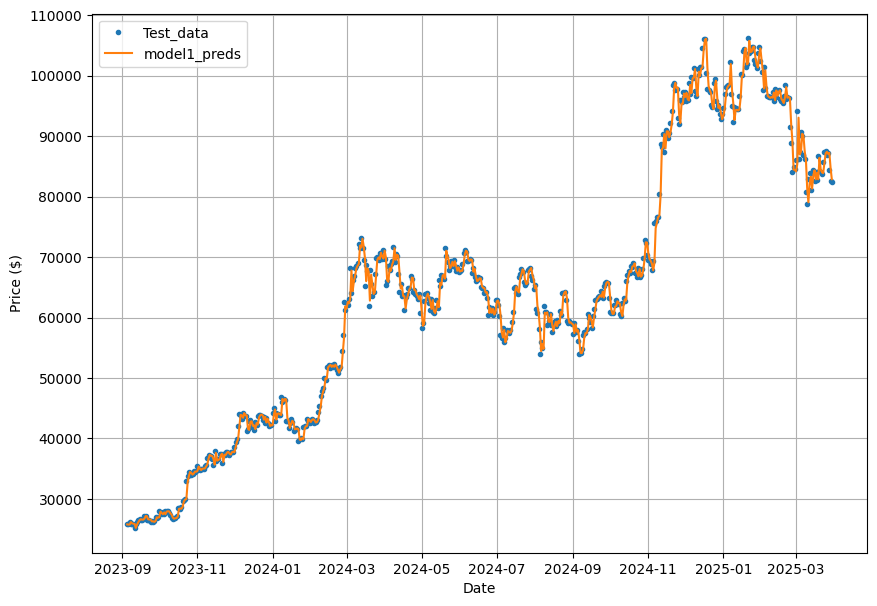

In [ ]:
offset = 500
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timestamps=X_test[-len(test_windows):], values=test_labels[-len(test_windows):], start=offset, label="Test_data")
plot_time_series(timestamps=X_test[-len(test_windows):], values=model1_preds, start=offset, format="-", label="model1_preds")

#### Experiment - 2

#####Formatting Our Data
"Windowing our dataset"
  - Horizon = 1
  - Window = 30

In [ ]:
HORIZON = 1
WINDOW_SIZE = 30

In [ ]:
final_windows , final_labels = make_windows(prices , window_size = WINDOW_SIZE , horizon=HORIZON)

In [ ]:
for i  in range(5000 , 5006):
  print(f"Window : {final_windows[i]}")
  print(f"Label : {final_labels[i]}")
  print("-"*50)

Window : [69901.99 70059.97 69529.85 70702.74 69850.52 69674.78 71216.98 69731.26
 65448.35 66074.16 68461.23 67928.77 68904.86 69388.74 71631.77 69198.22
 70513.6  70112.05 67208.21 64255.94 65582.95 63496.91 63679.78 61309.97
 63418.   63965.95 64857.99 64896.87 66818.89 66386.61]
Label : [64291.07]
--------------------------------------------------
Window : [70059.97 69529.85 70702.74 69850.52 69674.78 71216.98 69731.26 65448.35
 66074.16 68461.23 67928.77 68904.86 69388.74 71631.77 69198.22 70513.6
 70112.05 67208.21 64255.94 65582.95 63496.91 63679.78 61309.97 63418.
 63965.95 64857.99 64896.87 66818.89 66386.61 64291.07]
Label : [64495.27]
--------------------------------------------------
Window : [69529.85 70702.74 69850.52 69674.78 71216.98 69731.26 65448.35 66074.16
 68461.23 67928.77 68904.86 69388.74 71631.77 69198.22 70513.6  70112.05
 67208.21 64255.94 65582.95 63496.91 63679.78 61309.97 63418.   63965.95
 64857.99 64896.87 66818.89 66386.61 64291.07 64495.27]
Label : [63

##### Turning our created window into train and test sets

In [ ]:
final_windows[:5]  , final_labels[:5]

(array([[0.05  , 0.0858, 0.0808, 0.0747, 0.0792, 0.0505, 0.0626, 0.0545,
         0.0505, 0.056 , 0.06  , 0.0589, 0.0699, 0.0627, 0.0679, 0.0611,
         0.06  , 0.06  , 0.057 , 0.061 , 0.0623, 0.059 , 0.0609, 0.071 ,
         0.07  , 0.067 , 0.07  , 0.0645, 0.067 , 0.0653],
        [0.0858, 0.0808, 0.0747, 0.0792, 0.0505, 0.0626, 0.0545, 0.0505,
         0.056 , 0.06  , 0.0589, 0.0699, 0.0627, 0.0679, 0.0611, 0.06  ,
         0.06  , 0.057 , 0.061 , 0.0623, 0.059 , 0.0609, 0.071 , 0.07  ,
         0.067 , 0.07  , 0.0645, 0.067 , 0.0653, 0.0655],
        [0.0808, 0.0747, 0.0792, 0.0505, 0.0626, 0.0545, 0.0505, 0.056 ,
         0.06  , 0.0589, 0.0699, 0.0627, 0.0679, 0.0611, 0.06  , 0.06  ,
         0.057 , 0.061 , 0.0623, 0.059 , 0.0609, 0.071 , 0.07  , 0.067 ,
         0.07  , 0.0645, 0.067 , 0.0653, 0.0655, 0.07  ],
        [0.0747, 0.0792, 0.0505, 0.0626, 0.0545, 0.0505, 0.056 , 0.06  ,
         0.0589, 0.0699, 0.0627, 0.0679, 0.0611, 0.06  , 0.06  , 0.057 ,
         0.061 , 0.0623

In [ ]:
train_windows , train_labels , test_windows  , test_labels = make_train_test_splits(final_windows , final_labels)

In [ ]:
len(train_windows) , len(test_windows) , len(train_labels) , len(test_labels)

(4272, 1069, 4272, 1069)

In [ ]:
np.array_equal(np.squeeze(train_labels[:-HORIZON]), y_train[WINDOW_SIZE:len(train_labels) + WINDOW_SIZE - HORIZON])

False

##### Model-2 : Dense Model (Window = 30 , horizon = 1)

In [ ]:
tf.random.set_seed(42)
# 1. Construct Model
model2 = tf.keras.Sequential([
  layers.Dense(128 , activation="relu"),
  layers.Dense(HORIZON , activation="linear")
] , name = "Model_2_dense")

# Compiling the Model
model2.compile(
    loss = tf.keras.losses.mae ,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['mae' , "mse"]
)

# Fitting the Model
# Assuming model2 is defined and compiled
model2.fit(
    x=train_windows,
    y=train_labels,
    epochs=100,
    verbose=1,
    batch_size=128,
    validation_data=(test_windows, test_labels),
    callbacks=[create_model_checkpoint(model_name=model2.name)]
)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 780.5240 - mae: 780.5240 - mse: 3935546.5000 - val_loss: 2290.4885 - val_mae: 2290.4885 - val_mse: 10110984.0000
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 517.2272 - mae: 517.2272 - mse: 1693090.6250 - val_loss: 2722.0798 - val_mae: 2722.0798 - val_mse: 13110074.0000
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 486.5372 - mae: 486.5372 - mse: 1486641.2500 - val_loss: 1810.6307 - val_mae: 1810.6307 - val_mse: 6405812.5000
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 450.3247 - mae: 450.3247 - mse: 1314064.6250 - val_loss: 1687.2820 - val_mae: 1687.2820 - val_mse: 5649062.0000
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 435.7557 - mae: 435.7557 - mse: 1250054.7500 - val_loss: 1674.6809 - val_mae: 1674.6809 - val_mse: 5548138.0000
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 419.0545 - mae: 419.0545 - mse: 1146597.1250 - val_loss: 1620.5070 - val_mae: 1620.

##### Evaluations and logging

In [ ]:
# Evaluating model
model2.evaluate(test_windows , test_labels)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1042.2200 - mae: 1042.2200 - mse: 1957974.1250


[1493.1156005859375, 1493.1156005859375, 4258027.5]

In [ ]:
# Load in saved best performing model1 and evaluate it on test_data
model2 = tf.keras.models.load_model("model_experiments/Model_2_dense.keras")
model2.evaluate(test_windows , test_labels)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 675.3950 - mae: 675.3950 - mse: 1091622.2500


[935.3388061523438, 935.3388061523438, 2172709.75]

In [ ]:
model2_preds = make_preds(model2 , test_windows)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
model2_results = evaluate_preds(tf.squeeze(test_labels) , model2_preds)

In [ ]:
model2_results

{'mae': 935.3387451171875,
 'mse': 2172709.5,
 'rmse': 1474.0113525390625,
 'mape': 2.0471274852752686,
 'mase': 1.078139305114746}

In [ ]:
log_mlflow_regression("DenseW30H1", model2, HORIZON, WINDOW_SIZE, model2_results)

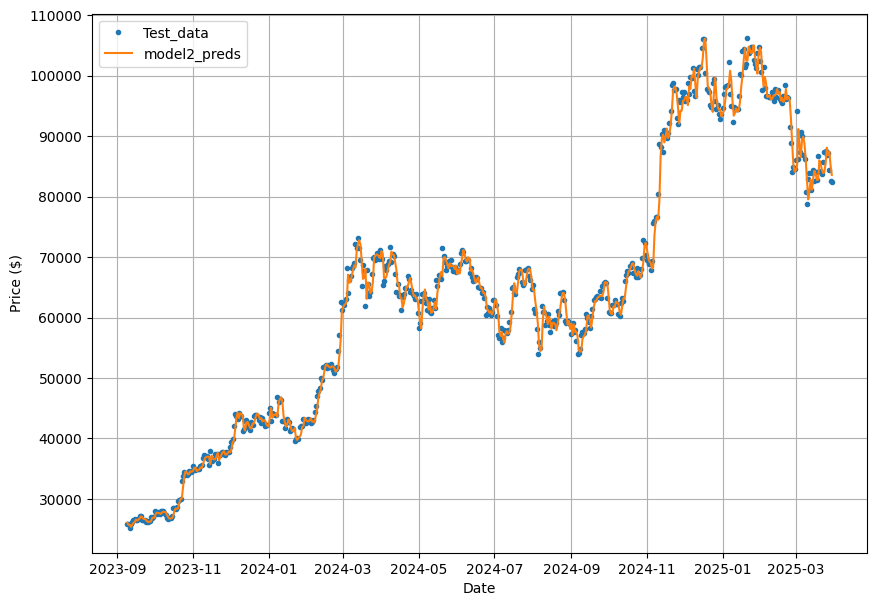

In [ ]:
offset = 500
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timestamps=X_test[-len(test_windows):], values=test_labels[-len(test_windows):], start=offset, label="Test_data")
plot_time_series(timestamps=X_test[-len(test_windows):], values=model2_preds, start=offset, format="-", label="model2_preds")

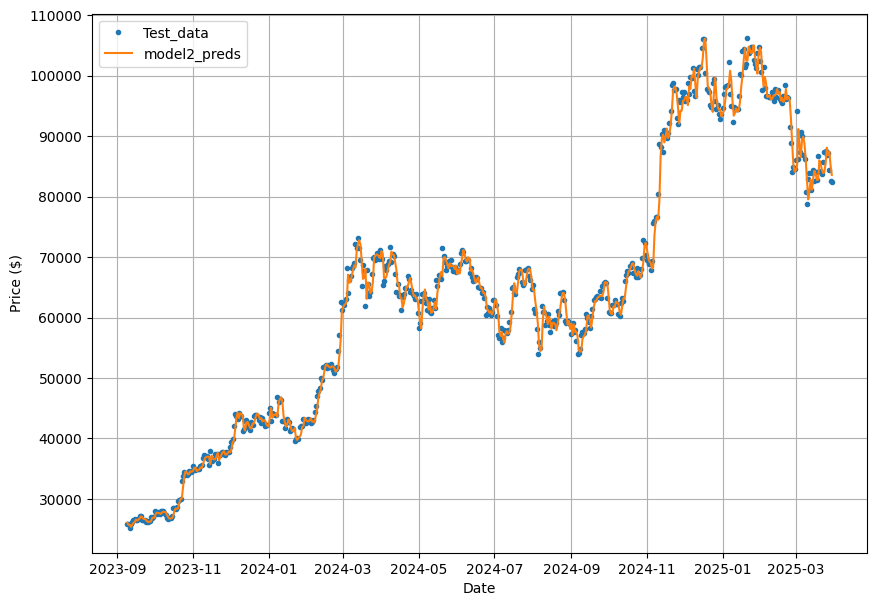

In [ ]:
offset = 500
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timestamps=X_test[-len(test_windows):], values=test_labels[-len(test_windows):], start=offset, label="Test_data")
plot_time_series(timestamps=X_test[-len(test_windows):], values=model2_preds, start=offset, format="-", label="model2_preds")

#### Experiment - 3

##### Formatting Our Data
"Windowing our dataset"

- Horizon = 7
- Window = 30

In [ ]:
HORIZON = 7
WINDOW_SIZE = 30

In [ ]:
final_windows , final_labels = make_windows(prices , window_size = WINDOW_SIZE , horizon=HORIZON)

In [ ]:
final_labels

array([[6.550000e-02, 7.000000e-02, 6.800000e-02, ..., 6.550000e-02,
        6.640000e-02, 6.600000e-02],
       [7.000000e-02, 6.800000e-02, 6.670000e-02, ..., 6.640000e-02,
        6.600000e-02, 6.490000e-02],
       [6.800000e-02, 6.670000e-02, 6.550000e-02, ..., 6.600000e-02,
        6.490000e-02, 6.500000e-02],
       ...,
       [8.379813e+04, 8.575002e+04, 8.736598e+04, ..., 8.694541e+04,
        8.723376e+04, 8.442801e+04],
       [8.575002e+04, 8.736598e+04, 8.748306e+04, ..., 8.723376e+04,
        8.442801e+04, 8.265911e+04],
       [8.736598e+04, 8.748306e+04, 8.694541e+04, ..., 8.442801e+04,
        8.265911e+04, 8.234582e+04]])

In [ ]:
for i  in range(5000 , 5006):
  print(f"Window : {final_windows[i]}")
  print(f"Label : {final_labels[i]}")
  print("-"*50)

Window : [69901.99 70059.97 69529.85 70702.74 69850.52 69674.78 71216.98 69731.26
 65448.35 66074.16 68461.23 67928.77 68904.86 69388.74 71631.77 69198.22
 70513.6  70112.05 67208.21 64255.94 65582.95 63496.91 63679.78 61309.97
 63418.   63965.95 64857.99 64896.87 66818.89 66386.61]
Label : [64291.07 64495.27 63806.23 63483.13 63059.25 63817.97 60761.95]
--------------------------------------------------
Window : [70059.97 69529.85 70702.74 69850.52 69674.78 71216.98 69731.26 65448.35
 66074.16 68461.23 67928.77 68904.86 69388.74 71631.77 69198.22 70513.6
 70112.05 67208.21 64255.94 65582.95 63496.91 63679.78 61309.97 63418.
 63965.95 64857.99 64896.87 66818.89 66386.61 64291.07]
Label : [64495.27 63806.23 63483.13 63059.25 63817.97 60761.95 58266.04]
--------------------------------------------------
Window : [69529.85 70702.74 69850.52 69674.78 71216.98 69731.26 65448.35 66074.16
 68461.23 67928.77 68904.86 69388.74 71631.77 69198.22 70513.6  70112.05
 67208.21 64255.94 65582.95 6349

##### Turning our created window into train and test sets

In [ ]:
final_windows[:5]  , final_labels[:5]

(array([[0.05  , 0.0858, 0.0808, 0.0747, 0.0792, 0.0505, 0.0626, 0.0545,
         0.0505, 0.056 , 0.06  , 0.0589, 0.0699, 0.0627, 0.0679, 0.0611,
         0.06  , 0.06  , 0.057 , 0.061 , 0.0623, 0.059 , 0.0609, 0.071 ,
         0.07  , 0.067 , 0.07  , 0.0645, 0.067 , 0.0653],
        [0.0858, 0.0808, 0.0747, 0.0792, 0.0505, 0.0626, 0.0545, 0.0505,
         0.056 , 0.06  , 0.0589, 0.0699, 0.0627, 0.0679, 0.0611, 0.06  ,
         0.06  , 0.057 , 0.061 , 0.0623, 0.059 , 0.0609, 0.071 , 0.07  ,
         0.067 , 0.07  , 0.0645, 0.067 , 0.0653, 0.0655],
        [0.0808, 0.0747, 0.0792, 0.0505, 0.0626, 0.0545, 0.0505, 0.056 ,
         0.06  , 0.0589, 0.0699, 0.0627, 0.0679, 0.0611, 0.06  , 0.06  ,
         0.057 , 0.061 , 0.0623, 0.059 , 0.0609, 0.071 , 0.07  , 0.067 ,
         0.07  , 0.0645, 0.067 , 0.0653, 0.0655, 0.07  ],
        [0.0747, 0.0792, 0.0505, 0.0626, 0.0545, 0.0505, 0.056 , 0.06  ,
         0.0589, 0.0699, 0.0627, 0.0679, 0.0611, 0.06  , 0.06  , 0.057 ,
         0.061 , 0.0623

In [ ]:
train_windows , train_labels , test_windows  , test_labels = make_train_test_splits(final_windows , final_labels)

In [ ]:
len(train_windows) , len(test_windows) , len(train_labels) , len(test_labels)

(4268, 1067, 4268, 1067)

In [ ]:
np.array_equal(np.squeeze(train_labels[:-HORIZON]), y_train[WINDOW_SIZE:len(train_labels) + WINDOW_SIZE - HORIZON])

False

##### Model-3 : Dense Model (Window = 30 , horizon = 7)

In [ ]:
tf.random.set_seed(42)
# 1. Construct Model
model3 = tf.keras.Sequential([
  layers.Dense(128 , activation="relu"),
  layers.Dense(HORIZON , activation="linear")
] , name = "Model_3_dense")

# Compiling the Model
model3.compile(
    loss = tf.keras.losses.mae ,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['mae' , "mse"]
)

# Fitting the Model
# Assuming model3 is defined and compiled
model3.fit(
    x=train_windows,
    y=train_labels,
    epochs=100,
    verbose=1,
    batch_size=128,
    validation_data=(test_windows, test_labels),
    callbacks=[create_model_checkpoint(model_name=model3.name)]
)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 5305.0527 - mae: 5305.0527 - mse: 210294432.0000 - val_loss: 4922.1567 - val_mae: 4922.1567 - val_mse: 47830604.0000
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 937.4846 - mae: 937.4846 - mse: 5978182.5000 - val_loss: 2982.6230 - val_mae: 2982.6230 - val_mse: 19084758.0000
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 768.9393 - mae: 768.9393 - mse: 3984177.2500 - val_loss: 2657.4053 - val_mae: 2657.4053 - val_mse: 15597788.0000
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 697.2897 - mae: 697.2897 - mse: 3384525.7500 - val_loss: 2535.8574 - val_mae: 2535.8574 - val_mse: 14108688.0000
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 660.7784 - mae: 660.7784 - mse: 3069670.5000 - val_loss: 2598.9514 - val_mae: 2598.9514 - val_mse: 14741120.0000
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 643.7543 - mae: 643.7543 - mse: 2948879.0000 - val_loss: 2443.8574 - val_mae

##### Evaluations and logging

In [ ]:
# Evaluating model
model3.evaluate(test_windows , test_labels)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1406.9062 - mae: 1406.9062 - mse: 4685202.0000


[1938.25732421875, 1938.25732421875, 8430936.0]

In [ ]:
# Load in saved best performing model1 and evaluate it on test_data
model3 = tf.keras.models.load_model("model_experiments/Model_3_dense.keras")
model3.evaluate(test_windows , test_labels)

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1322.9005 - mae: 1322.9005 - mse: 4380623.5000


[1805.6546630859375, 1805.6546630859375, 7654119.5]

In [ ]:
model3_preds = make_preds(model3 , test_windows)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [ ]:
model3_results = evaluate_preds(tf.squeeze(test_labels) , model3_preds)

In [ ]:
model3_results

{'mae': 1805.6546630859375,
 'mse': 7654119.5,
 'rmse': 2766.60791015625,
 'mape': 4.040930271148682,
 'mase': 2.0812437534332275}

In [ ]:
log_mlflow_regression("DenseW30H7", model3, HORIZON, WINDOW_SIZE, model3_results)

2025/04/09 02:16:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run DenseW30H7_Horizon1_Window7 at: https://dagshub.com/Shrijeet14/BitScry.mlflow/#/experiments/0/runs/00925b0f0857441fa08de0d993f3a35e
🧪 View experiment at: https://dagshub.com/Shrijeet14/BitScry.mlflow/#/experiments/0


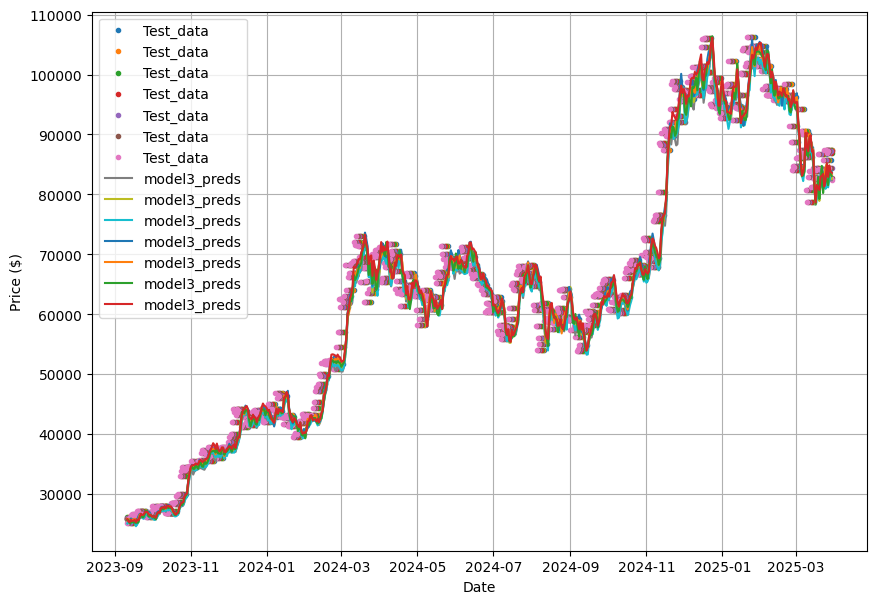

In [ ]:
offset = 500
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timestamps=X_test[-len(test_windows):], values=test_labels[-len(test_windows):], start=offset, label="Test_data")
plot_time_series(timestamps=X_test[-len(test_windows):], values=model3_preds, start=offset, format="-", label="model3_preds")

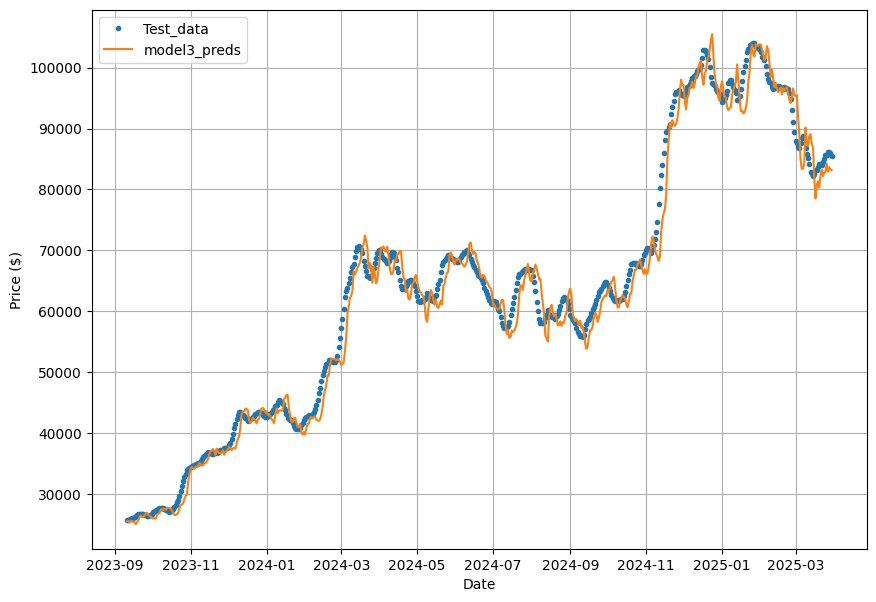

In [ ]:
offset = 500
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timestamps=X_test[-len(test_windows):], values=tf.reduce_mean(test_labels[-len(test_windows):],axis=1), start=offset, label="Test_data")
plot_time_series(timestamps=X_test[-len(test_windows):], values=tf.reduce_mean(model3_preds,axis=1), start=offset, format="-", label="model3_preds")

##### Making evaluation fuction for higher Horizons

In [ ]:
def evaluate_preds(y_true, y_pred):
    # Converting data into float32 datatype (for metric calculations)
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    # Mean Absolute Error
    mae_metric = tf.keras.metrics.MeanAbsoluteError()
    mae_metric.update_state(y_true, y_pred)
    mae = mae_metric.result()

    # Mean Squared Error
    mse_metric = tf.keras.metrics.MeanSquaredError()
    mse_metric.update_state(y_true, y_pred)
    mse = mse_metric.result()

    # Root Mean Squared Error (by taking the square root of MSE)
    rmse = tf.sqrt(mse)

    # Mean Absolute Percentage Error
    mape_metric = tf.keras.metrics.MeanAbsolutePercentageError()
    mape_metric.update_state(y_true, y_pred)
    mape = mape_metric.result()

    # Mean Absolute Scaled Error (assuming your custom function is defined similarly)
    mase = mean_absolute_scaled_error(y_true, y_pred)


    # Account for different sized metrics (for longer horizons, reduce to single number)
    if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
      mae = tf.reduce_mean(mae)
      mse = tf.reduce_mean(mse)
      rmse = tf.reduce_mean(rmse)
      mape = tf.reduce_mean(mape)
      mase = tf.reduce_mean(mase)


    return {
        "mae": float(mae.numpy()),
        "mse": float(mse.numpy()),
        "rmse": float(rmse.numpy()),
        "mape": float(mape.numpy()),
        "mase": float(mase.numpy())
    }


In [ ]:
model3_results = evaluate_preds(tf.squeeze(test_labels) , model3_preds)
model3_results

{'mae': 1805.6546630859375,
 'mse': 7654119.5,
 'rmse': 2766.60791015625,
 'mape': 4.040930271148682,
 'mase': 2.0812437534332275}

#### Experiment - 4

##### Formatting Our Data
- Model : Conv 1D model
- Window : 7
- Horizon : 1

In [83]:
HORIZON = 1
WINDOW_SIZE = 7

In [84]:
final_windows , final_labels = make_windows(prices , window_size = WINDOW_SIZE , horizon=HORIZON)

In [85]:
for i  in range(5000 , 5006):
  print(f"Window : {final_windows[i]}")
  print(f"Label : {final_labels[i]}")
  print("-"*50)

Window : [69901.99 70059.97 69529.85 70702.74 69850.52 69674.78 71216.98]
Label : [69731.26]
--------------------------------------------------
Window : [70059.97 69529.85 70702.74 69850.52 69674.78 71216.98 69731.26]
Label : [65448.35]
--------------------------------------------------
Window : [69529.85 70702.74 69850.52 69674.78 71216.98 69731.26 65448.35]
Label : [66074.16]
--------------------------------------------------
Window : [70702.74 69850.52 69674.78 71216.98 69731.26 65448.35 66074.16]
Label : [68461.23]
--------------------------------------------------
Window : [69850.52 69674.78 71216.98 69731.26 65448.35 66074.16 68461.23]
Label : [67928.77]
--------------------------------------------------
Window : [69674.78 71216.98 69731.26 65448.35 66074.16 68461.23 67928.77]
Label : [68904.86]
--------------------------------------------------


##### Turning our created window into train and test sets

In [ ]:
train_windows , train_labels , test_windows  , test_labels = make_train_test_splits(final_windows , final_labels)

In [ ]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works
x = tf.constant(train_windows[0])
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for timesteps
print(f"Original shape: {x.shape}") # (WINDOW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}") # (WINDOW_SIZE, input_dim)
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[0.05  ]
 [0.0858]
 [0.0808]
 [0.0747]
 [0.0792]
 [0.0505]
 [0.0626]]


##### Model-4 : Conv-1D Model (Window = 7 , horizon = 1)

In [ ]:
tf.random.set_seed(42)

# Creating our Conv1D Model
model4 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x , axis=1)),
    layers.Conv1D(filters=128 , kernel_size=5 , strides=1 , padding = 'causal' , activation = 'relu'),
    layers.Dense(HORIZON)
], name = "Model_4_conv1D")

# Compiling Model
model4.compile(
    loss = tf.keras.losses.mae ,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['mae' , "mse"]
)

# Fitting our Model
model4.fit(
    x=train_windows,
    y=train_labels,
    epochs=100,
    verbose=1,
    batch_size=128,
    validation_data=(test_windows, test_labels),
    callbacks=[create_model_checkpoint(model_name=model4.name)]
)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 5784.8696 - mae: 5784.8696 - mse: 178774176.0000 - val_loss: 5243.3726 - val_mae: 5243.3726 - val_mse: 41464352.0000
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 609.5303 - mae: 609.5303 - mse: 2475941.5000 - val_loss: 1651.6504 - val_mae: 1651.6504 - val_mse: 6172772.0000
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 442.5160 - mae: 442.5160 - mse: 1346660.1250 - val_loss: 1659.2031 - val_mae: 1659.2031 - val_mse: 5956565.0000
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 432.9608 - mae: 432.9608 - mse: 1291477.7500 - val_loss: 1633.6731 - val_mae: 1633.6731 - val_mse: 5779186.0000
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 427.6885 - mae: 427.6885 - mse: 1257812.6250 - val_loss: 1580.8202 - val_mae: 1580.8202 - val_mse: 5462856.0000
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 422.8089 - mae: 422.8089 - mse: 1226087.3750 - val_loss: 1545.1533 - val_mae: 15

##### Evaluations and logging

In [ ]:
# Evaluating model
model4.evaluate(test_windows , test_labels)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 664.7158 - mae: 664.7158 - mse: 1053498.5000


[918.8092041015625, 918.8092041015625, 2101855.75]

In [ ]:
# Load in saved best performing model4 and evaluate it on test_data
# model4 = tf.keras.models.load_model("model_experiments/Model_4_conv1D.keras", safe_mode=False)
# model4 = tf.keras.models.load_model("model_experiments/Model_4_conv1D.keras")
# model4.evaluate(test_windows , test_labels)

In [ ]:
model4_preds = make_preds(model4 , test_windows)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
model4_results = evaluate_preds(tf.squeeze(test_labels) , model4_preds)

In [ ]:
model4_results

{'mae': 918.8092041015625,
 'mse': 2101856.0,
 'rmse': 1449.7779541015625,
 'mape': 1.998550295829773,
 'mase': 1.0576579570770264}

In [ ]:
log_mlflow_regression("Conv1D", model4, HORIZON, WINDOW_SIZE, model4_results)

2025/04/09 02:16:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Conv1D_Horizon1_Window7 at: https://dagshub.com/Shrijeet14/BitScry.mlflow/#/experiments/0/runs/d7d97b87471542c1aad40ae0794f1932
🧪 View experiment at: https://dagshub.com/Shrijeet14/BitScry.mlflow/#/experiments/0


#### Experiment - 5

##### Model5 :  Model LSTM (Window = 7 , horizon = 1)

In [ ]:
tf.random.set_seed(42)

inputs = layers.Input(shape=(WINDOW_SIZE,))
x = layers.Lambda(lambda x: tf.expand_dims(x , axis=1))(inputs)
x = layers.LSTM(128, activation='relu')(x) # Here we changed the default tanh activation to relu
outputs = layers.Dense(HORIZON)(x)
model5 = tf.keras.Model(inputs , outputs , name = "Model_5_LSTM")

model5.compile(
    loss = tf.keras.losses.mae ,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['mae' , "mse"]
)

model5.fit(
    x=train_windows,
    y=train_labels,
    epochs=100,
    verbose=1,
    batch_size=128,
    validation_data=(test_windows, test_labels),
    callbacks=[create_model_checkpoint(model_name=model5.name)]
)
# ______________________________________________________________________________
## Difficulty :
# My LSTM Model was giving very poor performance of about 40k val loss which is really bad , so i struggled with this problem a lot changed the Layer parameters but couldn't get anything , finally i changed the activation function of layer to relu which was initially is tanh and that improved the model a lot.

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 5953.9644 - mae: 5953.9644 - mse: 175783520.0000 - val_loss: 2376.1860 - val_mae: 2376.1860 - val_mse: 10939910.0000
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 444.7398 - mae: 444.7398 - mse: 1335423.1250 - val_loss: 1503.8069 - val_mae: 1503.8069 - val_mse: 5127295.0000
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 397.1447 - mae: 397.1447 - mse: 1083895.0000 - val_loss: 1624.3160 - val_mae: 1624.3160 - val_mse: 5515773.5000
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 395.2841 - mae: 395.2841 - mse: 1095004.5000 - val_loss: 1494.7256 - val_mae: 1494.7256 - val_mse: 4988189.5000
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 392.9239 - mae: 392.9239 - mse: 1075160.0000 - val_loss: 1426.0492 - val_mae: 1426.0492 - val_mse: 4652528.5000
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 396.1313 - mae: 396.1313 - mse: 1092665.6250 - val_loss: 1400.1041 - val_mae:

##### Evaluations and logging

In [ ]:
# model5 = tf.keras.models.load_model("model_experiments/Model_5_LSTM.keras")
model5.evaluate(test_windows , test_labels)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 657.3801 - mae: 657.3801 - mse: 1045386.7500


[902.4391479492188, 902.4391479492188, 2058552.75]

In [ ]:
model5_preds = make_preds(model5 , test_windows)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [ ]:
model5_results = evaluate_preds(tf.squeeze(test_labels) , model5_preds)

In [ ]:
model5_results

{'mae': 902.439208984375,
 'mse': 2058552.75,
 'rmse': 1434.7657470703125,
 'mape': 1.9634528160095215,
 'mase': 1.0388141870498657}

In [ ]:
log_mlflow_regression("LSTM", model5, HORIZON, WINDOW_SIZE, model5_results)

2025/04/09 02:16:53 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/tmp6mb1pbvy/model/model.pkl, flavor: sklearn). Fall back to return ['scikit-learn==1.6.1', 'cloudpickle==3.1.1']. Set logging level to DEBUG to see the full traceback. 
2025/04/09 02:16:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run LSTM_Horizon1_Window7 at: https://dagshub.com/Shrijeet14/BitScry.mlflow/#/experiments/0/runs/ff5ada12b48e4e5a9992b018736673fa
🧪 View experiment at: https://dagshub.com/Shrijeet14/BitScry.mlflow/#/experiments/0


#### Experiment - 6

##### Making a multivariate time series **dataset**

##### Let's add one more feature to out dataset and try to improve the performance

- 1st Bitcoin halving date — November 28, 2012 — Reward down: 50 BTC to 25 BTC

- 2nd Bitcoin halving date — July 9, 2016 — Reward down:  25 BTC to 12.5 BTC

- 3rd Bitcoin halving date — May 11, 2020 — Reward down:  12.5 BTC to 6.25 BTC

- 4th Bitcoin halving date — April 19, 2024 — Reward down: 6.25 BTC to 3.125 BTC

- 5th Bitcoin halving date — April 17, 2028 — Reward down: 3.125 BTC to 1.5625 BTC

In [86]:
# @title Default title text
block_reward_1 = 50
block_reward_2 = 25
block_reward_3 = 12.5
block_reward_4 = 6.25
block_reward_5 = 3.125


block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")
block_reward_5_datetime = np.datetime64("2024-04-19")
block_reward_6_datetime = np.datetime64("2028-04-17")

In [87]:
block_reward_2_days = (block_reward_2_datetime - btc.index[0]).days
block_reward_3_days = (block_reward_3_datetime - btc.index[0]).days
block_reward_4_days = (block_reward_4_datetime - btc.index[0]).days
block_reward_5_days = (block_reward_5_datetime - btc.index[0]).days
block_reward_6_days = (block_reward_6_datetime - btc.index[0]).days
block_reward_2_days, block_reward_3_days, block_reward_4_days , block_reward_5_days ,  block_reward_6_days

(865, 2184, 3586, 5025, 6484)

In [88]:
btc.iloc[0]

,2010-07-17
Price,0.05


In [89]:
btc.iloc[5025]

,2024-04-19
Price,63965.95


In [90]:
# Add block_reward column
bitcoin_prices_block = btc.copy()
bitcoin_prices_block["block_reward"] = None

# Set values of block_reward column (it's the last column hence -1 indexing on iloc)
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_1
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_3_days:block_reward_4_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_4_days:block_reward_5_days, -1] = block_reward_4
bitcoin_prices_block.iloc[block_reward_5_days:block_reward_6_days, -1] = block_reward_5
bitcoin_prices_block

,Price,block_reward
Start,,
2010-07-17,0.0500,50
2010-07-18,0.0858,50
2010-07-19,0.0808,50
2010-07-20,0.0747,50
2010-07-21,0.0792,50
...,...,...
2025-03-26,86945.4100,3.125
2025-03-27,87233.7600,3.125
2025-03-28,84428.0100,3.125


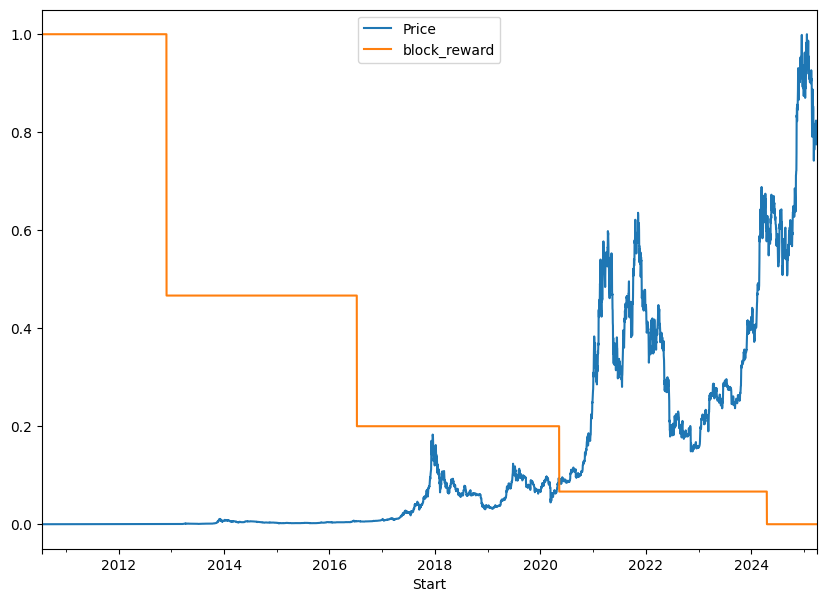

In [91]:
# Plot the block reward/price over time
# Note: Because of the different scales of our values we'll scale them to be between 0 and 1.
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]), # we need to scale the data first
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10, 7));

##### Making Windowed Data and train and test sets

In [92]:
HORIZON = 1
WINDOW_SIZE = 7

In [93]:
bitcoin_prices_windowed = bitcoin_prices_block.copy()

In [94]:
bitcoin_prices_windowed.head()

,Price,block_reward
Start,,
2010-07-17,0.0500,50
2010-07-18,0.0858,50
2010-07-19,0.0808,50
2010-07-20,0.0747,50
2010-07-21,0.0792,50


In [ ]:
# Add windowed columns
for i in range(WINDOW_SIZE):
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Start,,,,,,,,,
2010-07-17,0.0500,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-18,0.0858,50,0.0500,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-19,0.0808,50,0.0858,0.0500,NaN,NaN,NaN,NaN,NaN
2010-07-20,0.0747,50,0.0808,0.0858,0.0500,NaN,NaN,NaN,NaN
2010-07-21,0.0792,50,0.0747,0.0808,0.0858,0.0500,NaN,NaN,NaN
2010-07-22,0.0505,50,0.0792,0.0747,0.0808,0.0858,0.0500,NaN,NaN
2010-07-23,0.0626,50,0.0505,0.0792,0.0747,0.0808,0.0858,0.0500,NaN
2010-07-24,0.0545,50,0.0626,0.0505,0.0792,0.0747,0.0808,0.0858,0.0500
2010-07-25,0.0505,50,0.0545,0.0626,0.0505,0.0792,0.0747,0.0808,0.0858


In [ ]:
# Let's create X & y, remove the NaN's and convert to float32 to prevent TensorFlow errors
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Start,,,,,,,,
2010-07-24,50.0,0.0626,0.0505,0.0792,0.0747,0.0808,0.0858,0.0500
2010-07-25,50.0,0.0545,0.0626,0.0505,0.0792,0.0747,0.0808,0.0858
2010-07-26,50.0,0.0505,0.0545,0.0626,0.0505,0.0792,0.0747,0.0808
2010-07-27,50.0,0.0560,0.0505,0.0545,0.0626,0.0505,0.0792,0.0747
2010-07-28,50.0,0.0600,0.0560,0.0505,0.0545,0.0626,0.0505,0.0792


In [ ]:
y.head()

,Price
Start,
2010-07-24,0.0545
2010-07-25,0.0505
2010-07-26,0.0560
2010-07-27,0.0600
2010-07-28,0.0589


In [ ]:
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(4291, 4291, 1073, 1073)

##### Model-5 : Dense model using multivariate time series

In [ ]:
tf.random.set_seed(42)

# Make multivariate time series model
model6 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  # layers.Dense(128, activation="relu"), # adding an extra layer here should lead to beating the naive model
  layers.Dense(HORIZON)
], name="model_6_dense_multivariate")

# Compile
model6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model6.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
            verbose=1,
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model6.name)])

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 4379.1499 - val_loss: 3725.2627
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 513.7250 - val_loss: 1536.1361
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 407.2462 - val_loss: 1320.5974
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 352.4773 - val_loss: 1157.1135
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 330.6785 - val_loss: 1482.6252
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 315.5902 - val_loss: 1103.6565
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 310.5065 - val_loss: 1281.7411
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 320.1657 - val_loss: 1157.4158
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 320.3126 - val_loss: 1070.3480
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 295.9665 - val_loss: 1353.5244
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 309.7231 - val_loss: 1285.2769
Epoch 

##### Evaluations and logging

In [ ]:
# Make sure best model is loaded and evaluate
model6 = tf.keras.models.load_model("model_experiments/model_6_dense_multivariate.keras")
model6.evaluate(X_test, y_test)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 646.2584   


878.7893676757812

In [ ]:
# Make predictions on multivariate data
model6_preds = tf.squeeze(model6.predict(X_test))

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
# Evaluate preds
model6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model6_preds)

In [ ]:
model6_results

{'mae': 878.789306640625,
 'mse': 1983813.375,
 'rmse': 1408.4791259765625,
 'mape': 1.9138946533203125,
 'mase': 1.0115903615951538}

In [ ]:
log_mlflow_regression("MultiW7H1", model6, HORIZON, WINDOW_SIZE, model6_results)

2025/04/09 03:42:37 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run MultiW7H1_Horizon1_Window7 at: https://dagshub.com/Shrijeet14/BitScry.mlflow/#/experiments/0/runs/3079b3e69efc491bbe739178aa61e908
🧪 View experiment at: https://dagshub.com/Shrijeet14/BitScry.mlflow/#/experiments/0


#### Experiment - 7

##### N-Beats ALgorithm :
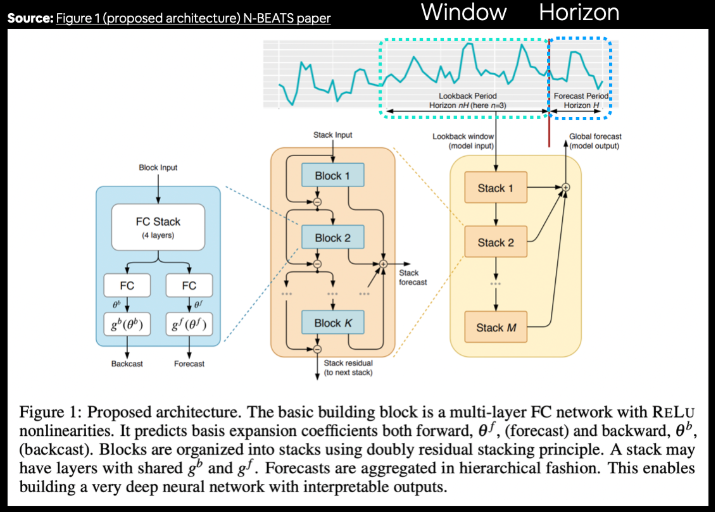

- N Beats block layer doesn't exist in tensorflow so we have to implement it ourselves.

In [59]:

# Create NBeatsBlock custom layer
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self, # the constructor takes all the hyperparameters for the layer
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # the **kwargs argument takes care of all of the arguments for the parent class (input_shape, trainable, name)
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs): # the call method is what runs when the layer is called
    x = inputs
    for layer in self.hidden: # pass inputs through each hidden layer
      x = layer(x)
    theta = self.theta_layer(x)
    # Output the backcast and forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast


##### Formatting Our Data
- Model : N-Beats Algorithm
- Window : 7
- Horizon : 1

In [50]:
HORIZON = 1
WINDOW_SIZE = 7

In [51]:
final_windows , final_labels = make_windows(prices , window_size = WINDOW_SIZE , horizon=HORIZON)

In [52]:
final_labels[0]

array([0.0545])

In [53]:
btcNbeats = pd.DataFrame(prices, columns=['Price']) # Create DataFrame
for i in range(WINDOW_SIZE):
  btcNbeats[f"Price+{i+1}"] = btcNbeats["Price"].shift(periods=i+1)
btcNbeats.dropna().head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
7,0.0545,0.0626,0.0505,0.0792,0.0747,0.0808,0.0858,0.0500
8,0.0505,0.0545,0.0626,0.0505,0.0792,0.0747,0.0808,0.0858
9,0.0560,0.0505,0.0545,0.0626,0.0505,0.0792,0.0747,0.0808
10,0.0600,0.0560,0.0505,0.0545,0.0626,0.0505,0.0792,0.0747
11,0.0589,0.0600,0.0560,0.0505,0.0545,0.0626,0.0505,0.0792


##### Turning our created window into train and test sets

In [54]:
X = btcNbeats.dropna().drop("Price", axis=1)
y = btcNbeats.dropna()["Price"]
# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(4291, 4291, 1073, 1073)

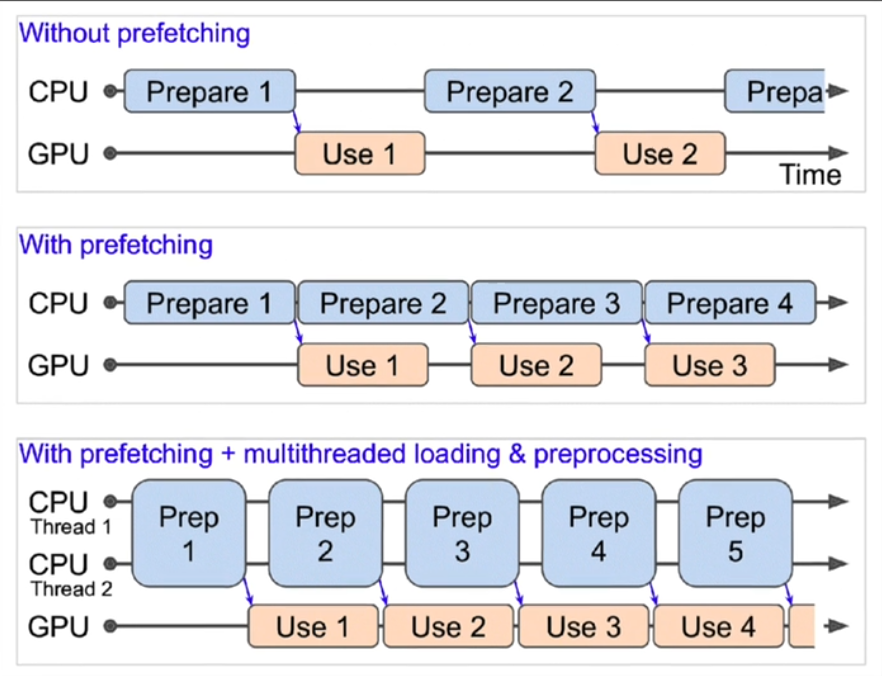

In [55]:
# 1. Turn train and test arrays into tensor Datasets
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# 2. Combine features & labels
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

##### Setting up hyperparameters for N-Beats algorithm

In [56]:
# Have taken these parameters from the research paper

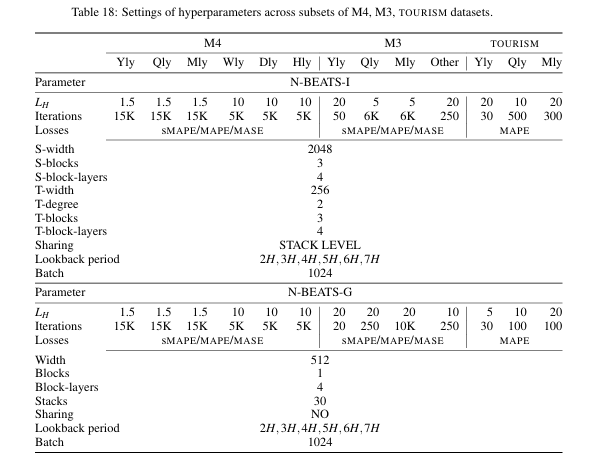

In [57]:
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE  + HORIZON

##### Creating Residual Networks

*N-BEATS Model Implementation Steps*

*1. Create the Basic Building Block*
- First, set up an `NBeatsBlock` layer that will serve as the foundational component
- This block will handle the initial transformations of your time series data

*2. Design the Input Layer*
- Create an input layer using Keras Functional API
- This layer will receive your time series data and feed it into the model

*3. Generate Initial Predictions*
- Use the block from step 1 to create:
  - An initial backcast (reconstruction of the input)
  - An initial forecast (prediction of future values)

*4. Build Stacked Architecture*
- Set up a for loop to create multiple stacks of blocks
- Each stack will further refine the model's predictions

*5. Create Block Layers Within Stacks*
- Inside the loop from step 4, create additional `NBeatsBlock` instances
- Each block will output its own backcast and forecast

*6. Implement Double Residual Stacking*
- Use subtract layers to calculate residuals between input and backcasts
- Use add layers to combine forecasts from different blocks
- This creates the "double residual" architecture that makes N-BEATS powerful

*7. Assemble the Complete Model*
- Connect all inputs and outputs using `tf.keras.Model()`
- This finalizes the model architecture

*8. Configure Model Training*
- Compile the model with:
  - Mean Absolute Error (MAE) loss function
  - Adam optimizer with default settings (as specified in the N-BEATS paper)

*9. Train With Smart Callbacks*
- Set up training for up to 5000 epochs with two key callbacks:
  - Early Stopping: Halt training if validation loss doesn't improve for 200 epochs
  - Learning Rate Reduction: Decrease learning rate by 10x if validation loss plateaus for 100 epochs

In [62]:
%%time
tf.random.set_seed(42)

# 1. Setup N-BEATS Block layer
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# 2. Create input to stacks
stack_input = layers.Input(shape=(INPUT_SIZE,), name="stack_input")

# 3. Create initial backcast and forecast input (backwards predictions are referred to as residuals in the paper)
backcast, forecast = nbeats_block_layer(stack_input)
residuals = layers.subtract([stack_input, backcast], name=f"subtract_00")
# 4. Create stacks of blocks
for i, _ in enumerate(range(N_STACKS-1)): # first stack is already created in (3)
  # 5. Use the NBeatsBlock to calculate the backcast as well as block forecast
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals) # pass it in residuals (the backcast)

  # 6. Create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. Put the stack model together
model7 = tf.keras.Model(inputs=stack_input,
                         outputs=forecast,
                         name="model_7_N-BEATS")

# 8. Compile with MAE loss and Adam optimizer
model7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["mae", "mse"])

# 9. Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
model7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=1, # prevent large amounts of training outputs
            # callbacks=[create_model_checkpoint(model_name=stack_model.name)] # saving model every epoch consumes far too much time
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])

Epoch 1/5000
5/5 ━━━━━━━━━━━━━━━━━━━━ 76s 4s/step - loss: 7154.8579 - mae: 7154.8579 - mse: 613963648.0000 - val_loss: 67715.7109 - val_mae: 67715.7109 - val_mse: 6067698176.0000 - learning_rate: 0.0010
Epoch 2/5000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step - loss: 1717.7188 - mae: 1717.7188 - mse: 21296534.0000 - val_loss: 47421.9141 - val_mae: 47421.9141 - val_mse: 2961192192.0000 - learning_rate: 0.0010
Epoch 3/5000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 158ms/step - loss: 7435.4946 - mae: 7435.4946 - mse: 398277440.0000 - val_loss: 26468.9043 - val_mae: 26468.9043 - val_mse: 925414848.0000 - learning_rate: 0.0010
Epoch 4/5000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 160ms/step - loss: 991.6857 - mae: 991.6857 - mse: 8912051.0000 - val_loss: 15580.8008 - val_mae: 15580.8008 - val_mse: 324921184.0000 - learning_rate: 0.0010
Epoch 5/5000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - loss: 2405.5295 - mae: 2405.5295 - mse: 40122056.0000 - val_loss: 26361.1875 - val_mae: 26361.1875 - val_mse: 916524288.0000 - learning

In [64]:
# Evaluate N-BEATS model on the test dataset
model7.evaluate(test_dataset)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 879.0718 - mae: 879.0718 - mse: 1962778.2500


[895.6238403320312, 895.6238403320312, 2037797.75]

In [67]:
# Make predictions with N-BEATS model
model7_preds = make_preds(model7, test_dataset)
model7_preds[:10]

2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([39758.727, 39594.883, 39609.86 , 40307.816, 38058.836, 39176.75 ,
       39634.02 , 38649.97 , 37968.48 , 38102.793], dtype=float32)>

In [68]:
model7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model7_preds)
model7_results

{'mae': 895.6239013671875,
 'mse': 2037797.5,
 'rmse': 1427.514404296875,
 'mape': 1.9429525136947632,
 'mase': 1.0309690237045288}

##### Plotting the N-Beats Algorithm

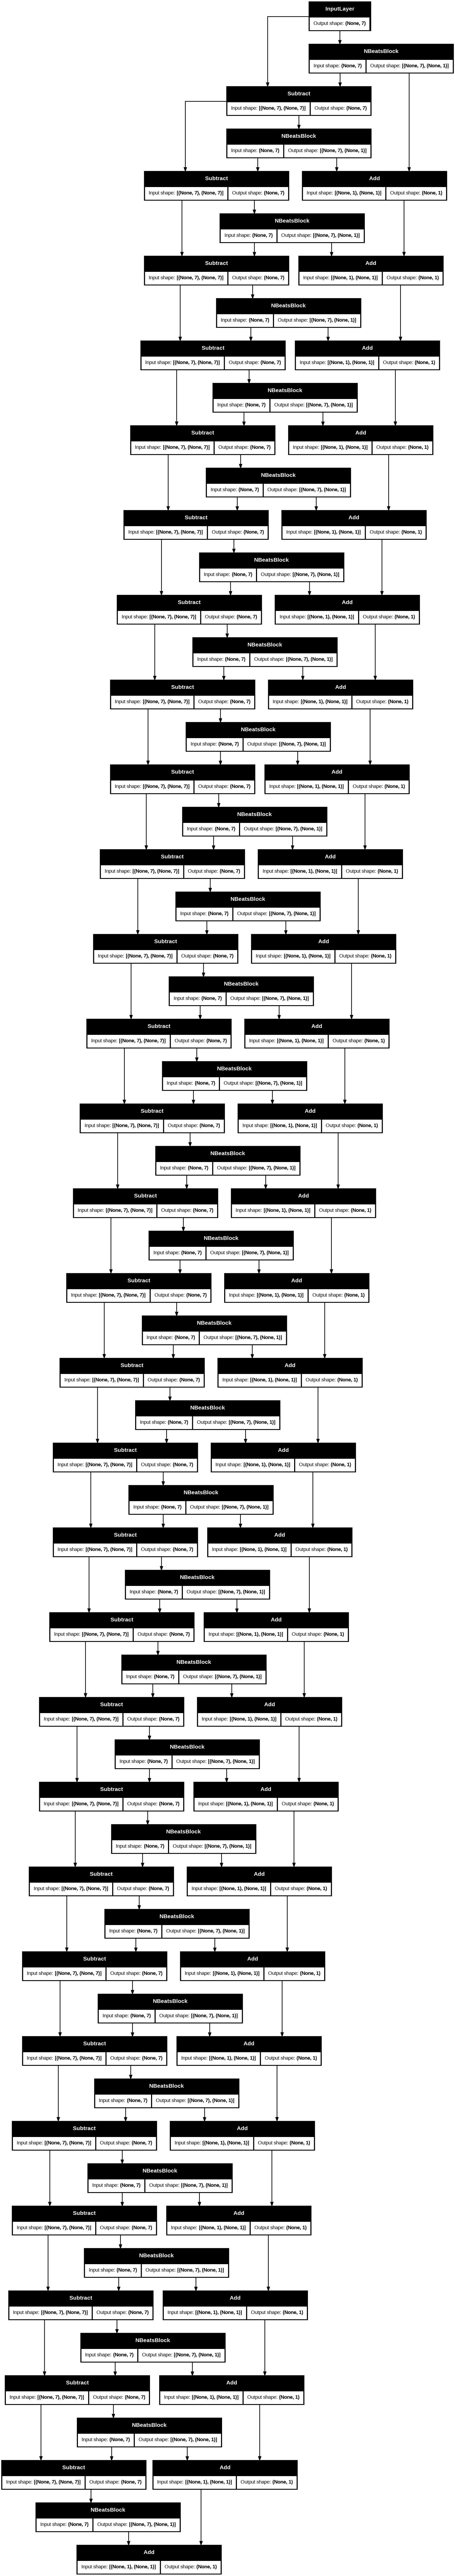

In [72]:
# Plot the N-BEATS model and inspect the architecture
from tensorflow.keras.utils import plot_model
plot_model(model7, to_file='model.png', show_shapes=True, dpi=96)

In [73]:
log_mlflow_regression("NbeatsW7H1", model7, HORIZON, WINDOW_SIZE, model7_results)

2025/04/09 11:10:18 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/tmp1mu1n55m/model/model.pkl, flavor: sklearn). Fall back to return ['scikit-learn==1.6.1', 'cloudpickle==3.1.1']. Set logging level to DEBUG to see the full traceback. 
2025/04/09 11:10:18 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run NbeatsW7H1_Horizon1_Window7 at: https://dagshub.com/Shrijeet14/BitScry.mlflow/#/experiments/0/runs/8cfd15ab2c6d4966b7af008ec9cac7a5
🧪 View experiment at: https://dagshub.com/Shrijeet14/BitScry.mlflow/#/experiments/0


#### Experiment - 8

##### Model - 8 : ensemble model (stacking different models together )

In [74]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=100,
                        loss_fns=["mae", "mse", "mape"]):

  ensemble_models = []

  # Create num_iter number of
  for i in range(num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      # Construct a simple model (similar to model_1)
      model = tf.keras.Sequential([
        # Initialize layers with normal (Gaussian) distribution so we can use the models for prediction
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(HORIZON)
      ])

      # Compile simple model with current loss function
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])

      # Fit model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                # Add callbacks to prevent training from going/stalling for too long
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])

      # Append fitted model to list of ensemble models
      ensemble_models.append(model)
  return ensemble_models

In [75]:
%%time
ensemble_models = get_ensemble_models(num_iter=5,num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0

Epoch 106: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 373: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 481: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.

Epoch 581: ReduceLROnPlateau reducing learning rate to 1.0000001111620805e-07.
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 370: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 470: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 171: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 271: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mae for 1000 epochs, model number: 1

Epoch 474: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing 

In [76]:
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data) # make predictions with current ensemble model
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [77]:
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


<tf.Tensor: shape=(15, 1073), dtype=float32, numpy=
array([[39796.863, 39515.004, 39483.555, ..., 87415.18 , 84522.875,
        82854.3  ],
       [40063.137, 39244.81 , 39257.477, ..., 87987.16 , 84707.47 ,
        82790.66 ],
       [39684.367, 39390.727, 39506.094, ..., 87329.81 , 84397.19 ,
        82669.02 ],
       ...,
       [39766.613, 39552.992, 39521.883, ..., 87380.34 , 84594.305,
        82720.01 ],
       [40020.484, 39609.234, 39316.29 , ..., 87341.24 , 85436.56 ,
        82684.234],
       [39687.07 , 39362.08 , 39516.227, ..., 87054.7  , 84296.59 ,
        82736.44 ]], dtype=float32)>

##### Evaluations and logging

In [78]:
# Evaluate ensemble model(s) predictions
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=np.median(ensemble_preds, axis=0)) # take the median across all ensemble predictions
ensemble_results

{'mae': 872.1649169921875,
 'mse': 1945678.25,
 'rmse': 1394.875732421875,
 'mape': 1.9052472114562988,
 'mase': 1.003964900970459}

In [79]:
log_mlflow_regression("Ensemble", ensemble_models , HORIZON, WINDOW_SIZE, ensemble_results)

2025/04/09 11:42:08 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
2025/04/09 11:42:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Ensemble_Horizon1_Window7 at: https://dagshub.com/Shrijeet14/BitScry.mlflow/#/experiments/0/runs/f2a422d8b07c4892b0b8dcef90e71006
🧪 View experiment at: https://dagshub.com/Shrijeet14/BitScry.mlflow/#/experiments/0


##### Getting Upper And Lower Bounds

In [80]:
def get_upper_lower(preds):
  std = tf.math.reduce_std(preds, axis=0)
  interval = 1.96 * std
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval
  return lower, upper
lower, upper = get_upper_lower(preds=ensemble_preds)

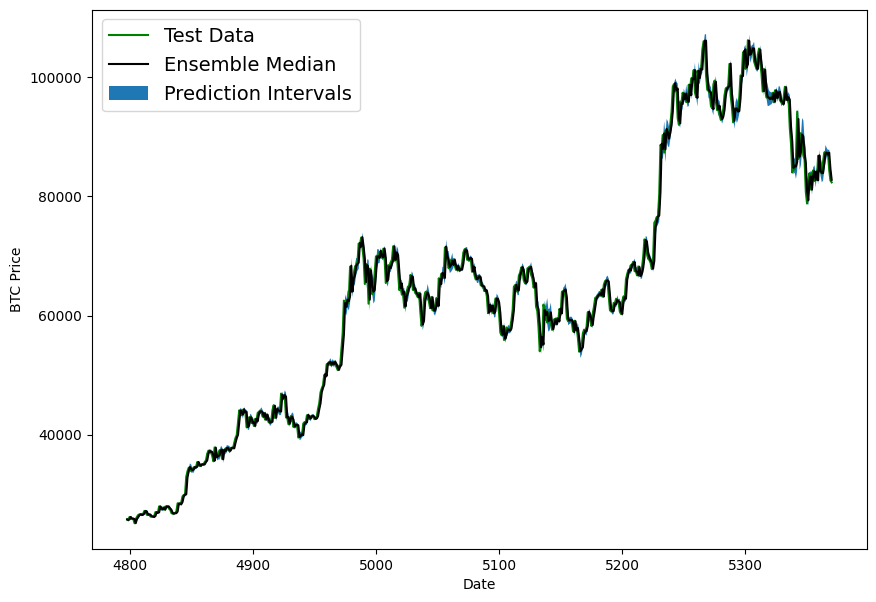

In [81]:
ensemble_median = np.median(ensemble_preds, axis=0)
offset=500
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:], label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14);

#### Experiment - 9

##### Formatting Our Data
- HORIZON = 1
- WINDOW_SIZE = 7

In [82]:
HORIZON = 1
WINDOW_SIZE = 7

In [95]:
bitcoin_prices_windowed = bitcoin_prices_block.copy()

In [98]:
bitcoin_prices_windowed

,Price,block_reward
Start,,
2010-07-17,0.0500,50
2010-07-18,0.0858,50
2010-07-19,0.0808,50
2010-07-20,0.0747,50
2010-07-21,0.0792,50
...,...,...
2025-03-26,86945.4100,3.125
2025-03-27,87233.7600,3.125
2025-03-28,84428.0100,3.125


##### Future Prediction Model

In [99]:
X_all = bitcoin_prices_windowed.drop(["Price", "block_reward"], axis=1).dropna().to_numpy()
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()

In [100]:
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

BATCH_SIZE = 1024
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 0), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [102]:
dataset_all

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 0), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

Model-9 : Dense Model (Window = 7 , Horizon = 1 , 1 more layer , using entire dataset)

In [103]:
tf.random.set_seed(42)

# Create model (nice and simple, just to test)
model9 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
])

# Compile
model9.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

# Fit model on all of the data to make future forecasts
model9.fit(dataset_all,
            epochs=100,
            verbose=1)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - loss: 7175.8809
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7175.8750
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7175.8687
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7175.8628
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7175.8569
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7175.8511
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7175.8447
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7175.8389
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7175.8330
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7175.8271
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7175.8208
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7175.8154
Epoch 13/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7175.8091
Epoch 14/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7175.8037
Epoch 15/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - los

##### Make Predictions into the future


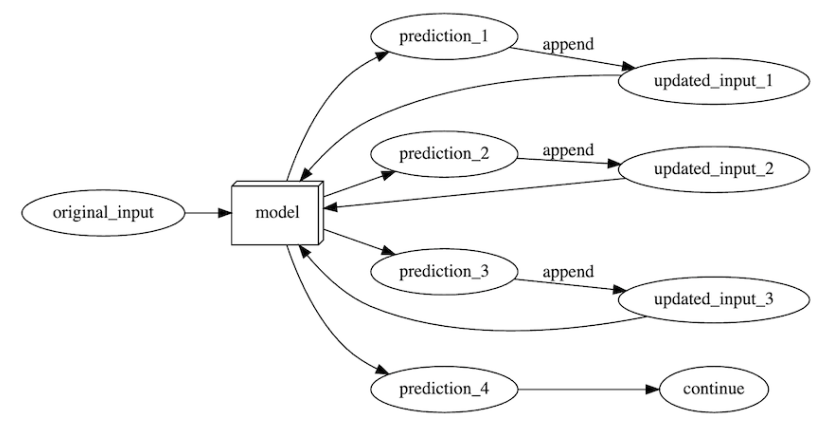

In [121]:
def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  future_forecast = []
  last_window = values[-WINDOW_SIZE:]
  for _ in range(into_future):
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")
    future_forecast.append(tf.squeeze(future_pred).numpy())
    print(future_forecast)
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]

  return future_forecast

In [122]:
INTO_FUTURE = 14

In [123]:
future_forecast = make_future_forecast(values=y_all,
                                       model=model7,
                                       into_future=INTO_FUTURE,
                                       window_size=WINDOW_SIZE)
future_forecast

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predicting on: 
 [87365.98 87483.06 86945.41 87233.76 84428.01 82659.11 82345.82] -> Prediction: 87399.140625

[np.float32(87399.14)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Predicting on: 
 [87483.06     86945.41     87233.76     84428.01     82659.11
 82345.82     87399.140625] -> Prediction: 86620.2578125

[np.float32(87399.14), np.float32(86620.26)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Predicting on: 
 [86945.41      87233.76      84428.01      82659.11      82345.82
 87399.140625  86620.2578125] -> Prediction: 86503.6640625

[np.float32(87399.14), np.float32(86620.26), np.float32(86503.664)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predicting on: 
 [87233.76      84428.01      82659.11      82345.82      87399.140625
 86620.2578125 86503.6640625] -> Prediction: 86399.953125

[np.float32(87399.14), np.float32(86620.26), np.float32(86503.664), np.float32(86399.95)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predicting on: 
 [84428.01      82659.11      8

[np.float32(87399.14),
 np.float32(86620.26),
 np.float32(86503.664),
 np.float32(86399.95),
 np.float32(84260.15),
 np.float32(82944.44),
 np.float32(82942.58),
 np.float32(87343.82),
 np.float32(85750.92),
 np.float32(86238.89),
 np.float32(85898.39),
 np.float32(84212.95),
 np.float32(83352.26),
 np.float32(83396.63)]

In [124]:
def get_future_dates(start_date, into_future, offset=1):
  start_date = start_date + np.timedelta64(offset, "D")
  end_date = start_date + np.timedelta64(into_future, "D")
  return np.arange(start_date, end_date, dtype="datetime64[D]")

In [125]:
# Last timestep of timesteps (currently in np.datetime64 format)
last_timestep = btc.index[-1]
last_timestep

Timestamp('2025-03-30 00:00:00')

In [126]:
# Get next two weeks of timesteps
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2025-03-31', '2025-04-01', '2025-04-02', '2025-04-03',
       '2025-04-04', '2025-04-05', '2025-04-06', '2025-04-07',
       '2025-04-08', '2025-04-09', '2025-04-10', '2025-04-11',
       '2025-04-12', '2025-04-13'], dtype='datetime64[D]')

In [127]:
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, prices[-1])
next_time_steps, future_forecast

(array(['2025-03-30', '2025-03-31', '2025-04-01', '2025-04-02',
        '2025-04-03', '2025-04-04', '2025-04-05', '2025-04-06',
        '2025-04-07', '2025-04-08', '2025-04-09', '2025-04-10',
        '2025-04-11', '2025-04-12', '2025-04-13'], dtype='datetime64[D]'),
 array([82345.82 , 87399.14 , 86620.26 , 86503.664, 86399.95 , 84260.15 ,
        82944.44 , 82942.58 , 87343.82 , 85750.92 , 86238.89 , 85898.39 ,
        84212.95 , 83352.26 , 83396.63 ], dtype=float32))

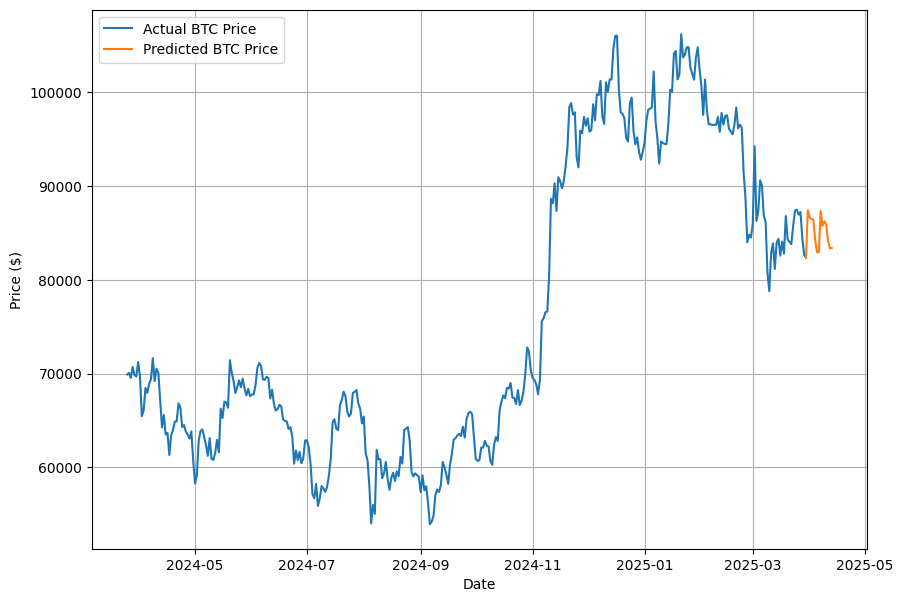

In [133]:
# Plot future price predictions of Bitcoin
plt.figure(figsize=(10, 7))
plot_time_series(btc.index, prices, start=5000, format="-", label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BTC Price")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predicting on: 
 [87365.98 87483.06 86945.41 87233.76 84428.01 82659.11 82345.82] -> Prediction: 87399.140625

[np.float32(87399.14)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicting on: 
 [87483.06     86945.41     87233.76     84428.01     82659.11
 82345.82     87399.140625] -> Prediction: 86620.2578125

[np.float32(87399.14), np.float32(86620.26)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicting on: 
 [86945.41      87233.76      84428.01      82659.11      82345.82
 87399.140625  86620.2578125] -> Prediction: 86503.6640625

[np.float32(87399.14), np.float32(86620.26), np.float32(86503.664)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicting on: 
 [87233.76      84428.01      82659.11      82345.82      87399.140625
 86620.2578125 86503.6640625] -> Prediction: 86399.953125

[np.float32(87399.14), np.float32(86620.26), np.float32(86503.664), np.float32(86399.95)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicting on: 
 [84428.01      82659.11      8

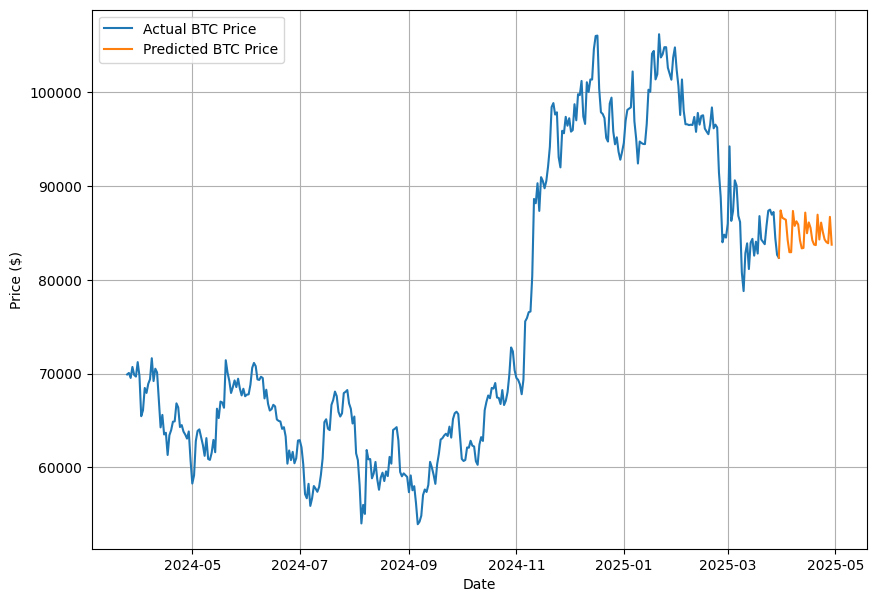

In [137]:
INTO_FUTURE = 30
future_forecast = make_future_forecast(values=y_all,
                                       model=model7,
                                       into_future=INTO_FUTURE,
                                       window_size=WINDOW_SIZE)
last_timestep = btc.index[-1]
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE)
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, prices[-1])
plt.figure(figsize=(10, 7))
plot_time_series(btc.index, prices, start=5000, format="-", label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BTC Price")

In [143]:
d=zip(next_time_steps,future_forecast)
pd.DataFrame(d)

,0,1
0,2025-03-30,82345.820312
1,2025-03-31,87399.140625
2,2025-04-01,86620.257812
3,2025-04-02,86503.664062
4,2025-04-03,86399.953125
5,2025-04-04,84260.148438
6,2025-04-05,82944.437500
7,2025-04-06,82942.578125
8,2025-04-07,87343.820312
9,2025-04-08,85750.921875


###  THE END